In [4]:
# Data manipulation libraries
import pandas as pd
import numpy as np

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from pycaret.classification import *
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay
from pycaret.classification import setup
from imblearn.over_sampling import SMOTE

# Data preprocessing and analysis libraries
import umap
import umap.plot
import scipy.stats as stats
from scipy.stats import norm, skew

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [3]:
!pip install pandas matplotlib datashader bokeh holoviews scikit-image colorcet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 43.4 MB/s eta 0:00:00


In [6]:
df = pd.read_csv('Base.csv')


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4908 entries, 0 to 4907
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   fraud_bool                        4908 non-null   int64  
 1   income                            4908 non-null   float64
 2   name_email_similarity             4908 non-null   float64
 3   prev_address_months_count         4908 non-null   int64  
 4   current_address_months_count      4908 non-null   int64  
 5   customer_age                      4908 non-null   int64  
 6   days_since_request                4908 non-null   float64
 7   intended_balcon_amount            4908 non-null   float64
 8   payment_type                      4908 non-null   object 
 9   zip_count_4w                      4908 non-null   int64  
 10  velocity_6h                       4908 non-null   float64
 11  velocity_24h                      4907 non-null   float64
 12  veloci

In [8]:
df.head(5)

fraud_bool  income  name_email_similarity  prev_address_months_count  \
0           0     0.3               0.986506                         -1   
1           0     0.8               0.617426                         -1   
2           0     0.8               0.996707                          9   
3           0     0.6               0.475100                         11   
4           0     0.9               0.842307                         -1   

   current_address_months_count  customer_age  days_since_request  \
0                            25            40            0.006735   
1                            89            20            0.010095   
2                            14            40            0.012316   
3                            14            30            0.006991   
4                            29            40            5.742626   

   intended_balcon_amount payment_type  zip_count_4w  ...  has_other_cards  \
0              102.453711           AA          1059  ...              0.0   
1               -0.849551           AD          1658  ...              0.0   
2               -1.490386           AB          1095  ...              0.0   
3               -1.863101           AB          3483  ...              0.0   
4               47.152498           AA          2339  ...              0.0   

   proposed_credit_limit  foreign_request    source  \
0                 1500.0              0.0  INTERNET   
1                 1500.0              0.0  INTERNET   
2                  200.0              0.0  INTERNET   
3                  200.0              0.0  INTERNET   
4                  200.0              0.0  INTERNET   

   session_length_in_minutes device_os  keep_alive_session  \
0                  16.224843     linux                 1.0   
1                   3.363854     other                 1.0   
2                  22.730559   windows                 0.0   
3                  15.215816     linux                 1.0   
4                   3.743048     other                 0.0   

   device_distinct_emails_8w device_fraud_count  month  
0                        1.0                0.0    0.0  
1                        1.0                0.0    0.0  
2                        1.0                0.0    0.0  
3                        1.0                0.0    0.0  
4                        1.0                0.0    0.0  

[5 rows x 32 columns]

In [9]:
# Missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head()

Total   Percent
credit_risk_score              1  0.000204
email_is_free                  1  0.000204
device_fraud_count             1  0.000204
device_distinct_emails_8w      1  0.000204
keep_alive_session             1  0.000204

In [12]:
df.isnull().sum()

fraud_bool                          0
income                              0
name_email_similarity               0
prev_address_months_count           0
current_address_months_count        0
customer_age                        0
days_since_request                  0
intended_balcon_amount              0
payment_type                        0
zip_count_4w                        0
velocity_6h                         0
velocity_24h                        1
velocity_4w                         1
bank_branch_count_8w                1
date_of_birth_distinct_emails_4w    1
employment_status                   1
credit_risk_score                   1
email_is_free                       1
housing_status                      1
phone_home_valid                    1
phone_mobile_valid                  1
bank_months_count                   1
has_other_cards                     1
proposed_credit_limit               1
foreign_request                     1
source                              1
session_leng

In [13]:
from sklearn.impute import SimpleImputer

# Create an instance of SimpleImputer with the mean strategy for numerical columns
imputer_num = SimpleImputer(strategy="mean")

# Create an instance of SimpleImputer with the most frequent strategy for categorical columns
imputer_cat = SimpleImputer(strategy="most_frequent")

# Loop through columns and apply imputation for both train and test datasets


for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        df[column] = imputer_num.fit_transform(df[[column]])[:, 0]
    else :
        df[column] = imputer_cat.fit_transform(df[[column]])[:, 0]

In [14]:
df.isnull().sum()

fraud_bool                          0
income                              0
name_email_similarity               0
prev_address_months_count           0
current_address_months_count        0
customer_age                        0
days_since_request                  0
intended_balcon_amount              0
payment_type                        0
zip_count_4w                        0
velocity_6h                         0
velocity_24h                        0
velocity_4w                         0
bank_branch_count_8w                0
date_of_birth_distinct_emails_4w    0
employment_status                   0
credit_risk_score                   0
email_is_free                       0
housing_status                      0
phone_home_valid                    0
phone_mobile_valid                  0
bank_months_count                   0
has_other_cards                     0
proposed_credit_limit               0
foreign_request                     0
source                              0
session_leng

<Axes: >

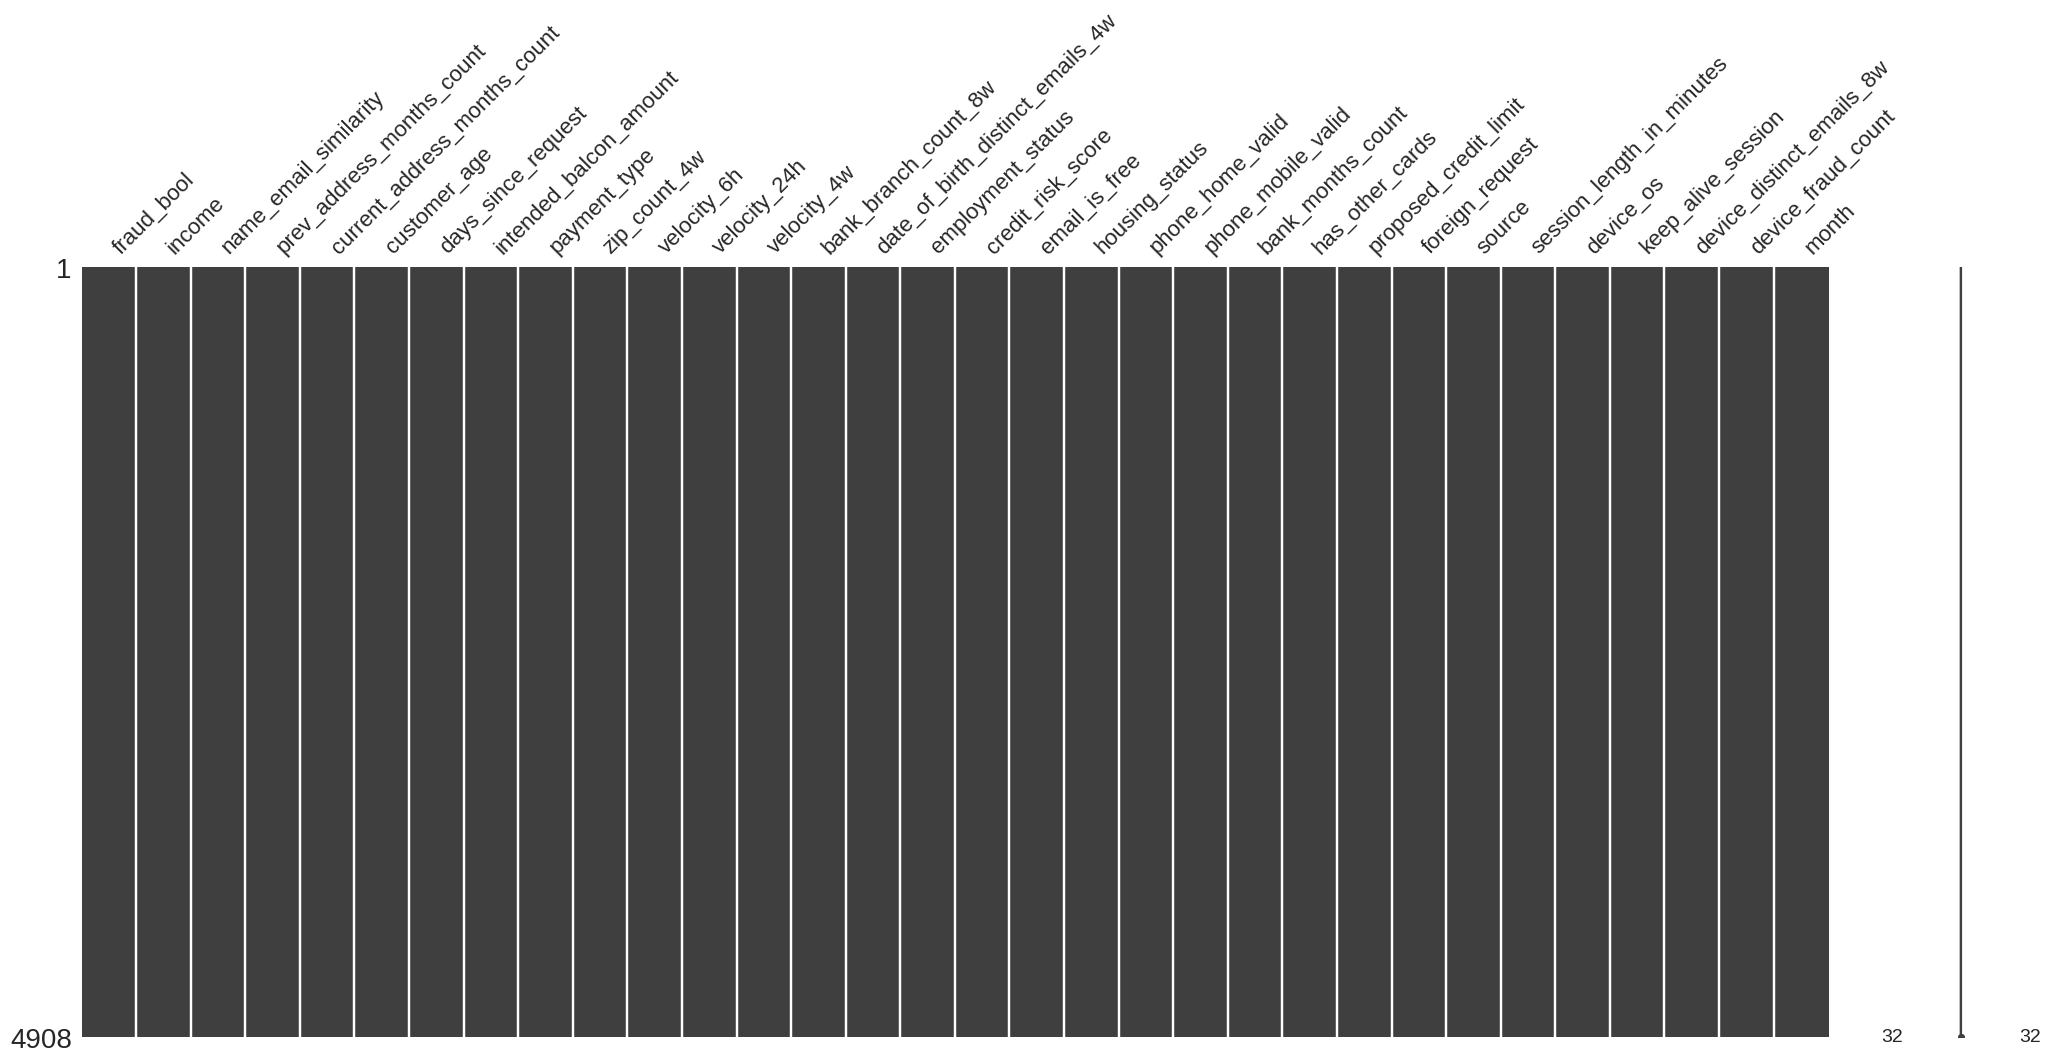

In [17]:
import missingno as msno
msno.matrix(df)

In [15]:
df.head(5)

fraud_bool  income  name_email_similarity  prev_address_months_count  \
0         0.0     0.3               0.986506                       -1.0   
1         0.0     0.8               0.617426                       -1.0   
2         0.0     0.8               0.996707                        9.0   
3         0.0     0.6               0.475100                       11.0   
4         0.0     0.9               0.842307                       -1.0   

   current_address_months_count  customer_age  days_since_request  \
0                          25.0          40.0            0.006735   
1                          89.0          20.0            0.010095   
2                          14.0          40.0            0.012316   
3                          14.0          30.0            0.006991   
4                          29.0          40.0            5.742626   

   intended_balcon_amount payment_type  zip_count_4w  ...  has_other_cards  \
0              102.453711           AA        1059.0  ...              0.0   
1               -0.849551           AD        1658.0  ...              0.0   
2               -1.490386           AB        1095.0  ...              0.0   
3               -1.863101           AB        3483.0  ...              0.0   
4               47.152498           AA        2339.0  ...              0.0   

   proposed_credit_limit  foreign_request    source  \
0                 1500.0              0.0  INTERNET   
1                 1500.0              0.0  INTERNET   
2                  200.0              0.0  INTERNET   
3                  200.0              0.0  INTERNET   
4                  200.0              0.0  INTERNET   

   session_length_in_minutes device_os  keep_alive_session  \
0                  16.224843     linux                 1.0   
1                   3.363854     other                 1.0   
2                  22.730559   windows                 0.0   
3                  15.215816     linux                 1.0   
4                   3.743048     other                 0.0   

   device_distinct_emails_8w device_fraud_count  month  
0                        1.0                0.0    0.0  
1                        1.0                0.0    0.0  
2                        1.0                0.0    0.0  
3                        1.0                0.0    0.0  
4                        1.0                0.0    0.0  

[5 rows x 32 columns]

Transforming numerical columns

In [20]:
from scipy.stats import yeojohnson
val = yeojohnson(df[col])[0]

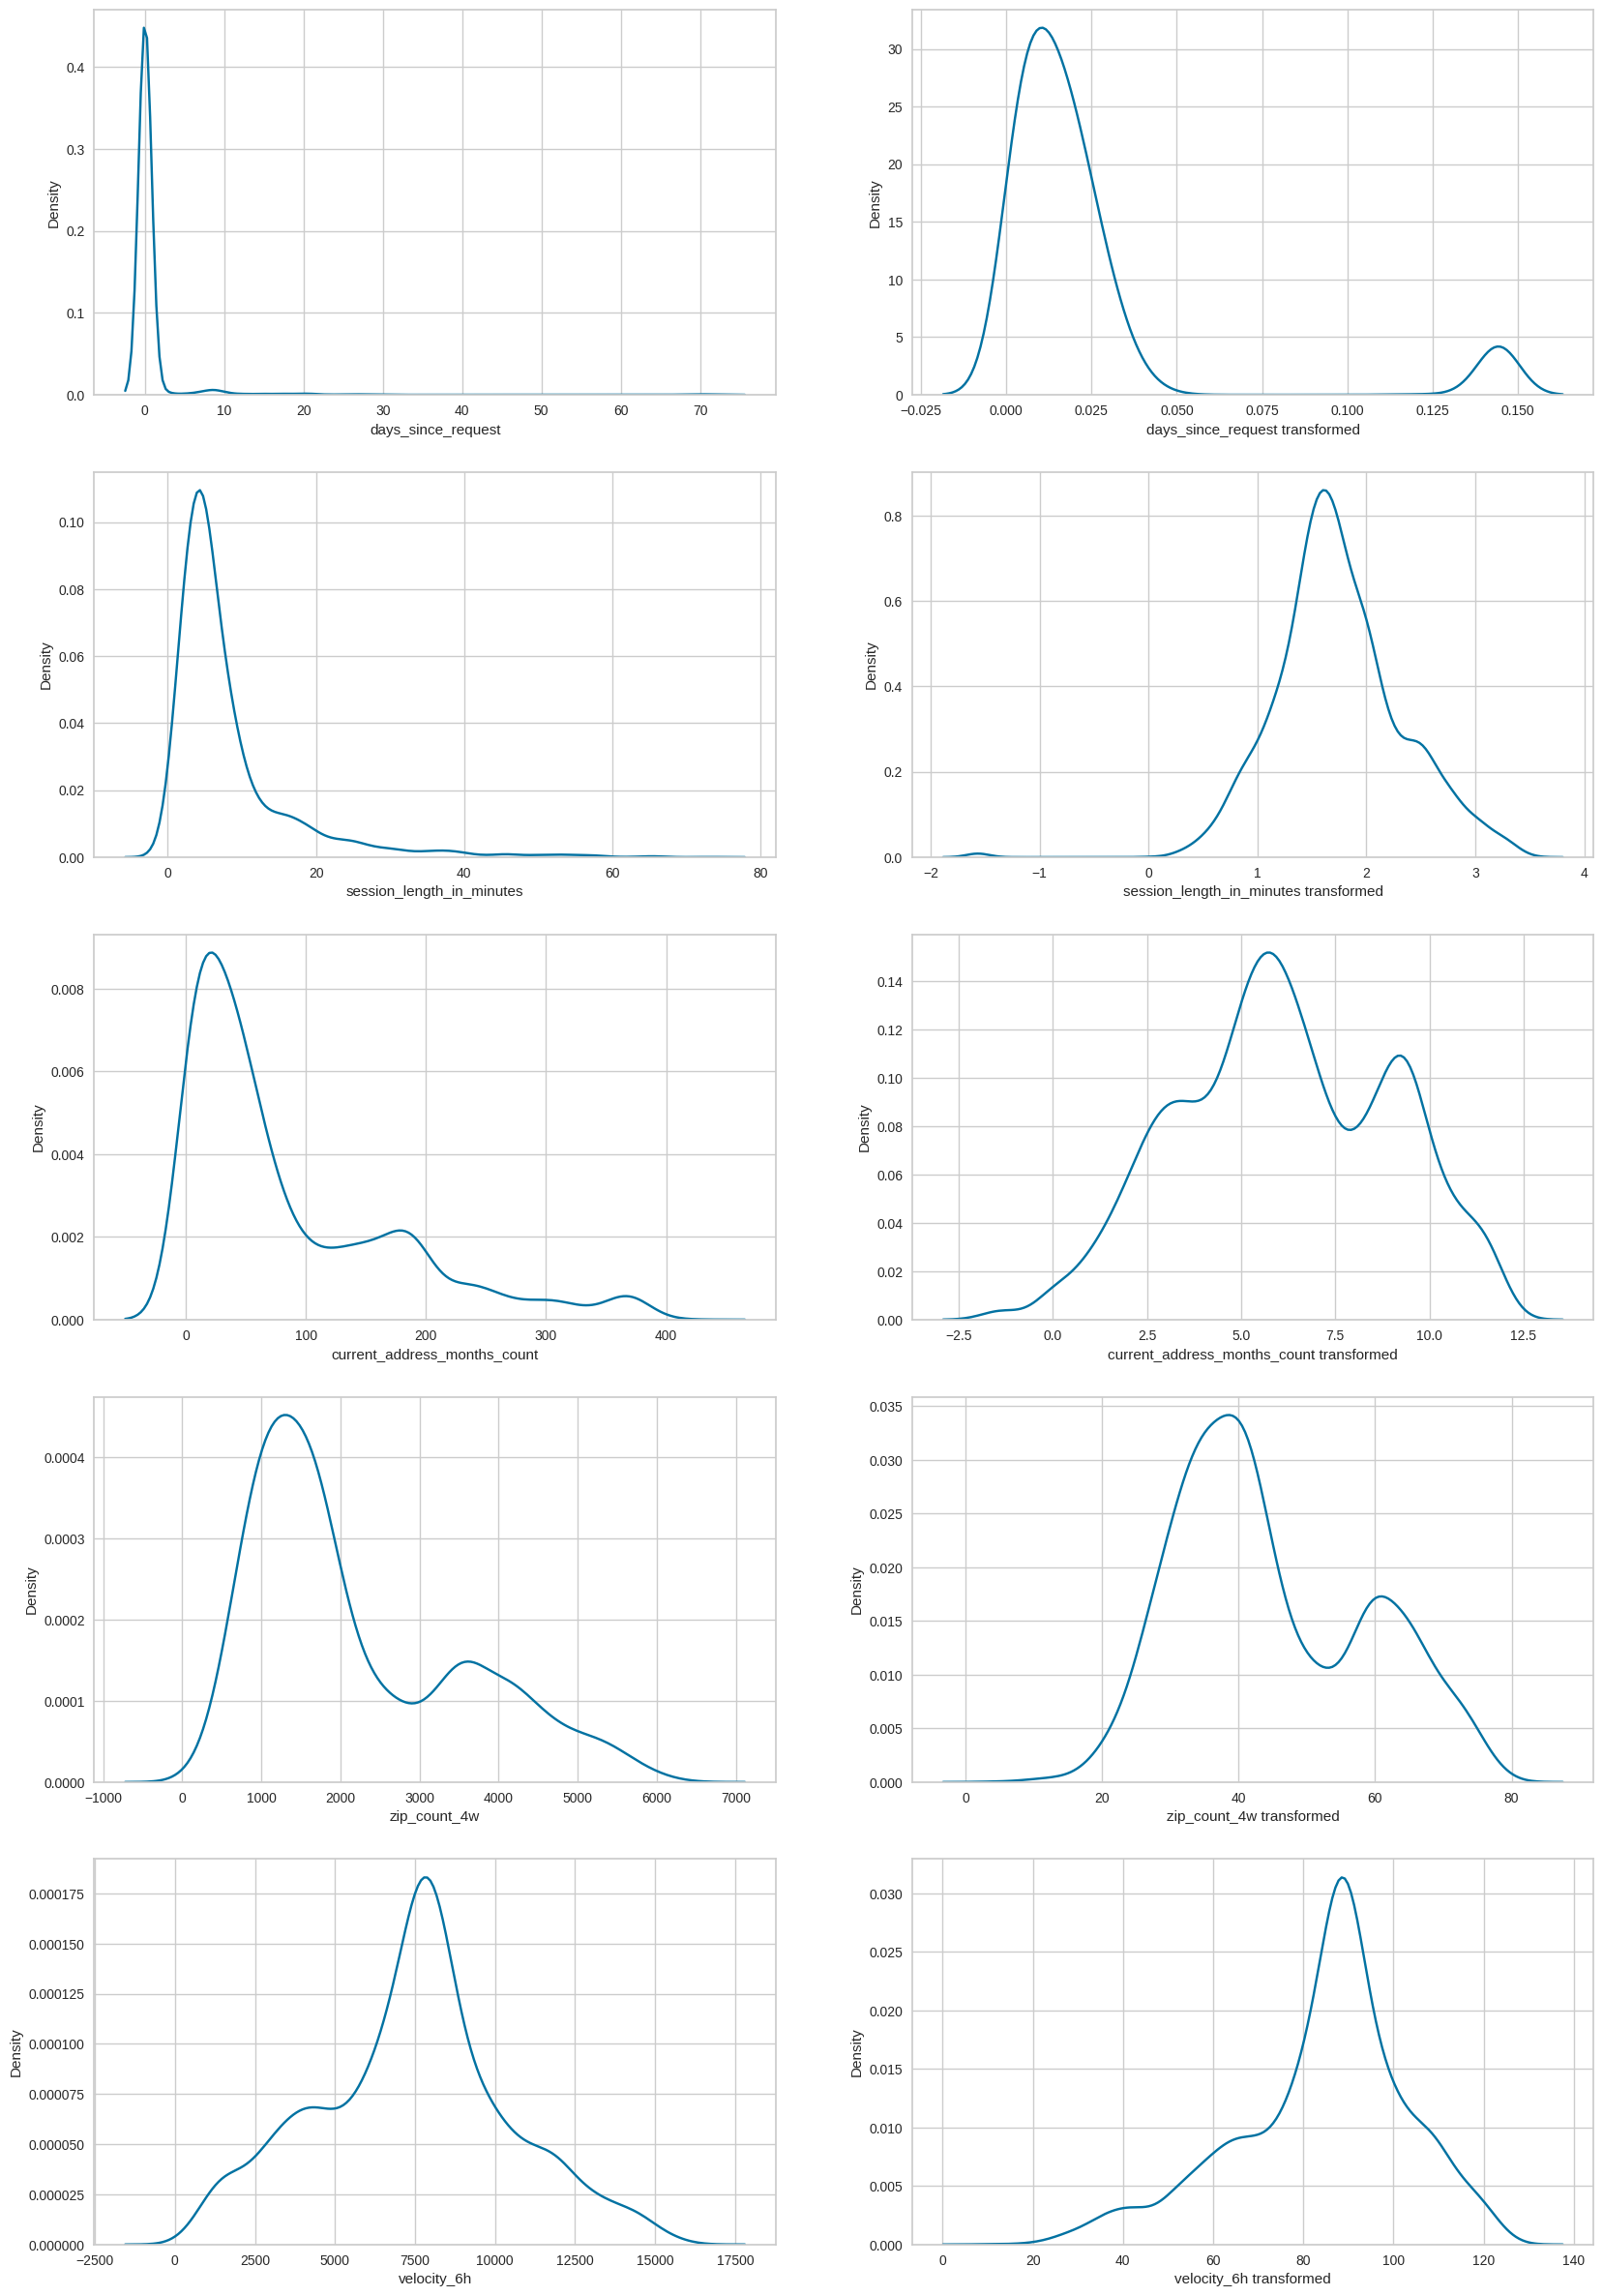

In [21]:
yeo = ["days_since_request", "session_length_in_minutes", "current_address_months_count"]
sqrt = ["zip_count_4w", "velocity_6h"]

fig, axes = plt.subplots(len(np.concatenate([yeo, sqrt])),2)
fig.set_figheight(30)
fig.set_figwidth(20)

for i, col in enumerate(np.concatenate([yeo, sqrt])) :

    orig = df[col].values

    if col ==  "velocity_6h" :
        val = np.sqrt(df[col])
    elif col == "zip_count_4w" :
        val = np.sqrt(df[col])
    else :
        val = yeojohnson(df[col])[0]

    ax1 = axes.flat[i*2]
    ax2 = axes.flat[i*2+1]

    sns.kdeplot(orig, ax = ax1)
    ax1.set_xlabel(f"{col}")
    sns.kdeplot(val, ax = ax2)
    ax2.set_xlabel(f"{col} transformed")


plt.show()

        fraud_bool       income  name_email_similarity  \
count  4908.000000  4908.000000            4908.000000   
mean      0.010187     0.553443               0.475240   
std       0.100428     0.287364               0.287416   
min       0.000000     0.100000               0.000998   
25%       0.000000     0.300000               0.191167   
50%       0.000000     0.600000               0.495576   
75%       0.000000     0.800000               0.730126   
max       1.000000     0.900000               0.999975   

       prev_address_months_count  current_address_months_count  customer_age  \
count                4908.000000                   4908.000000   4908.000000   
mean                   17.884067                     85.621638     33.657294   
std                    45.526848                     90.306521     12.496191   
min                    -1.000000                     -1.000000     10.000000   
25%                    -1.000000                     18.000000     20.000000 

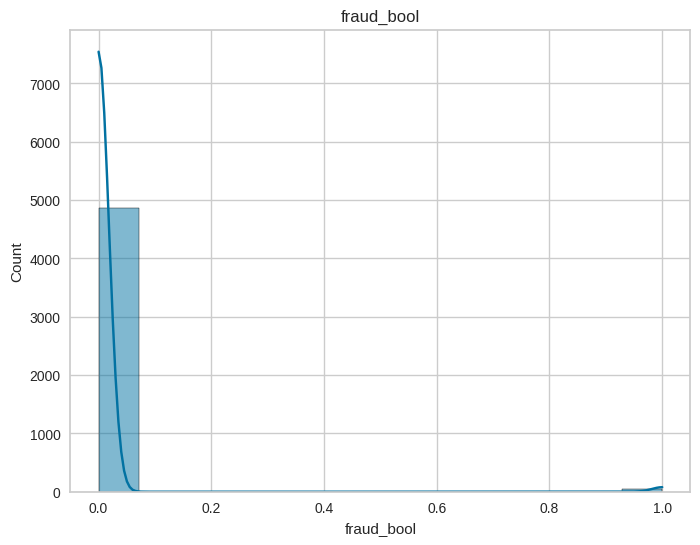

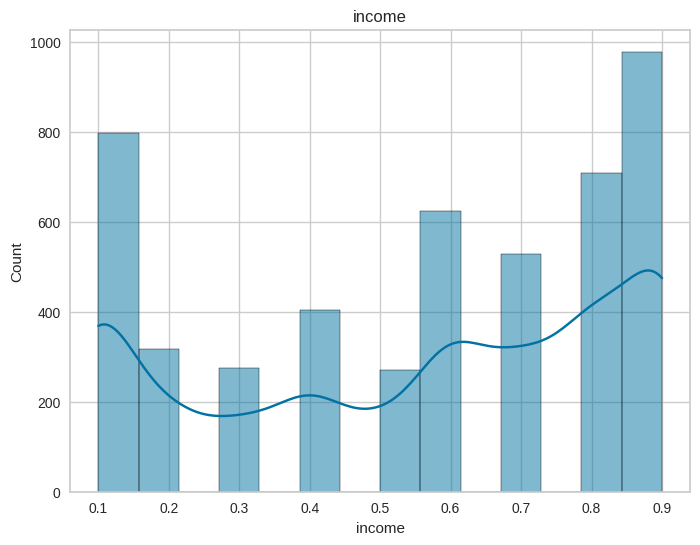

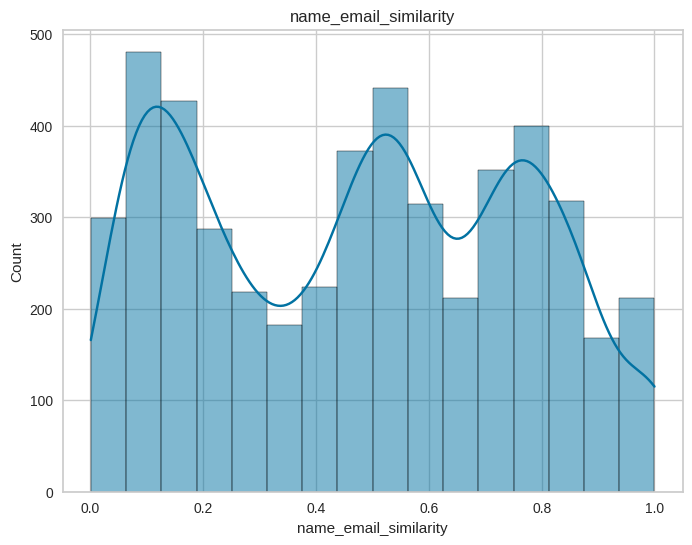

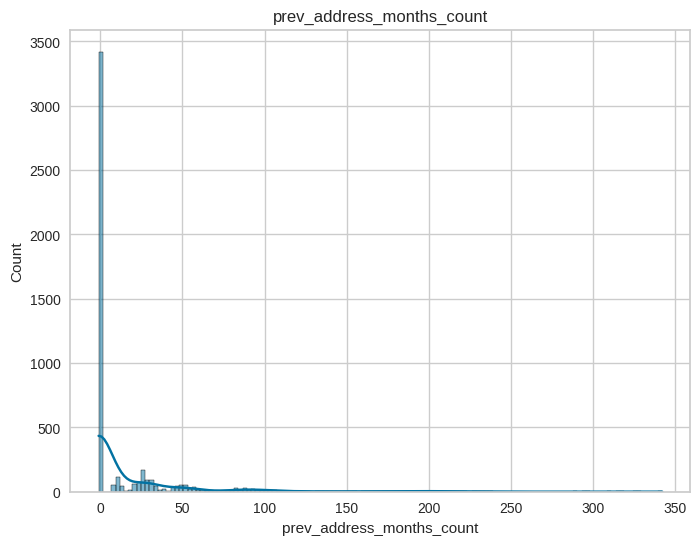

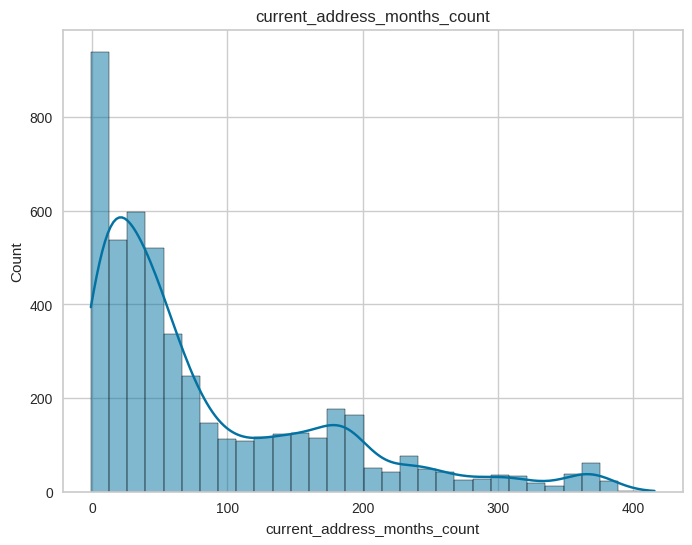

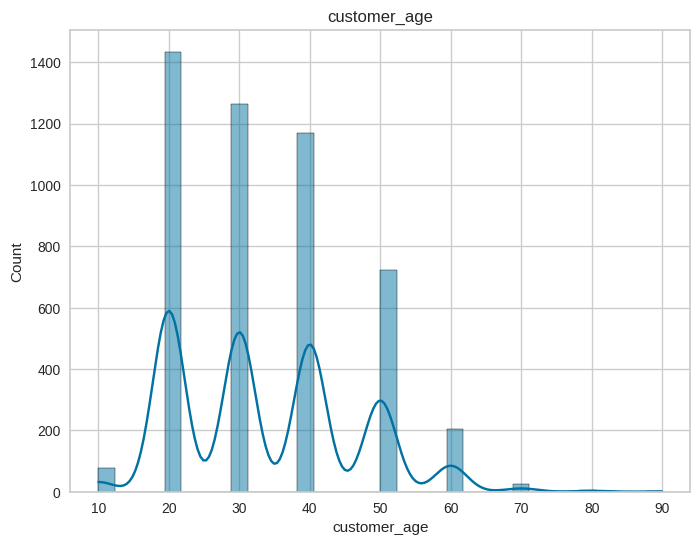

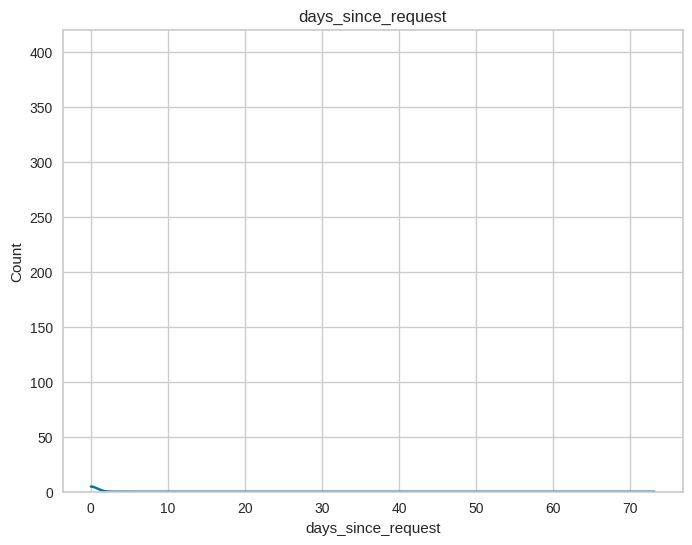

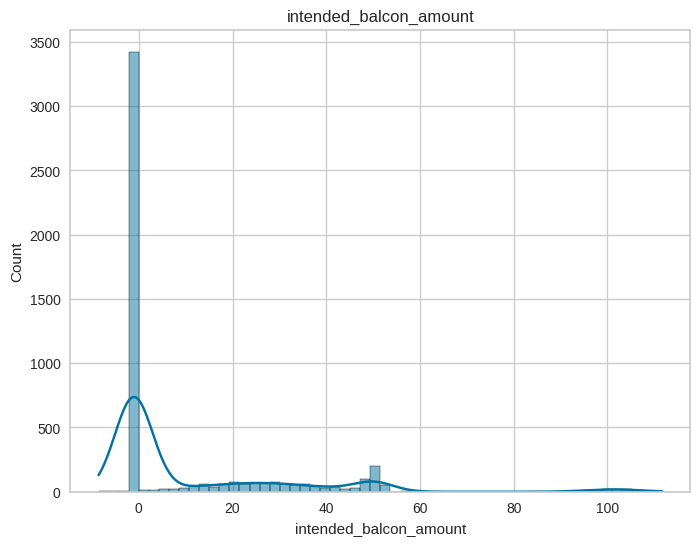

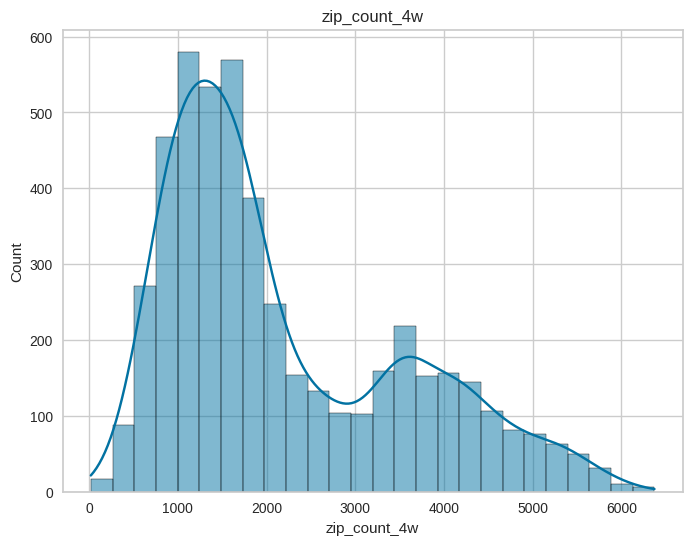

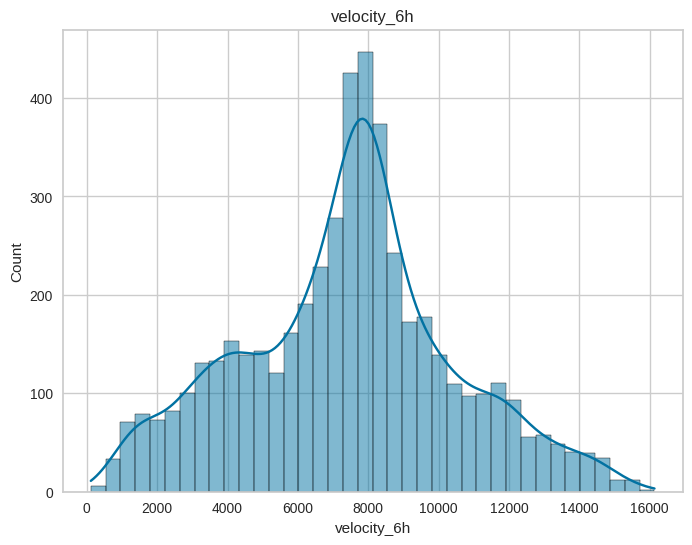

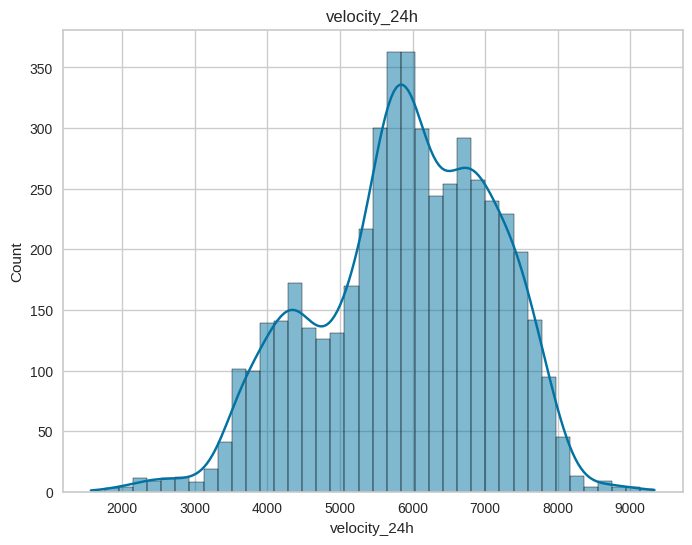

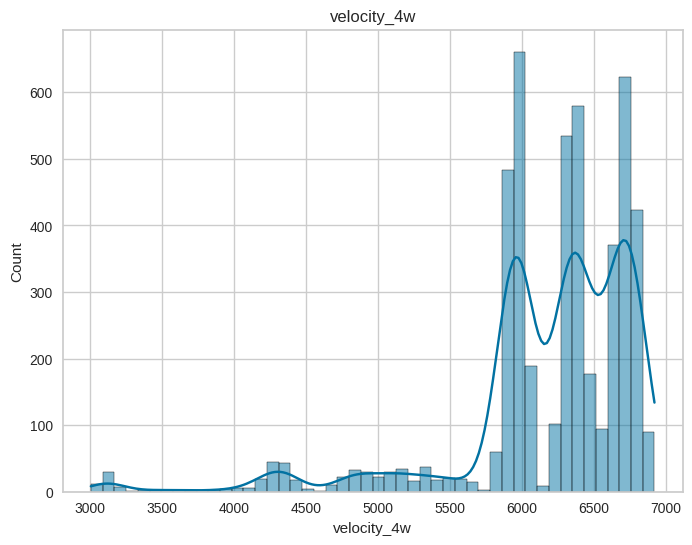

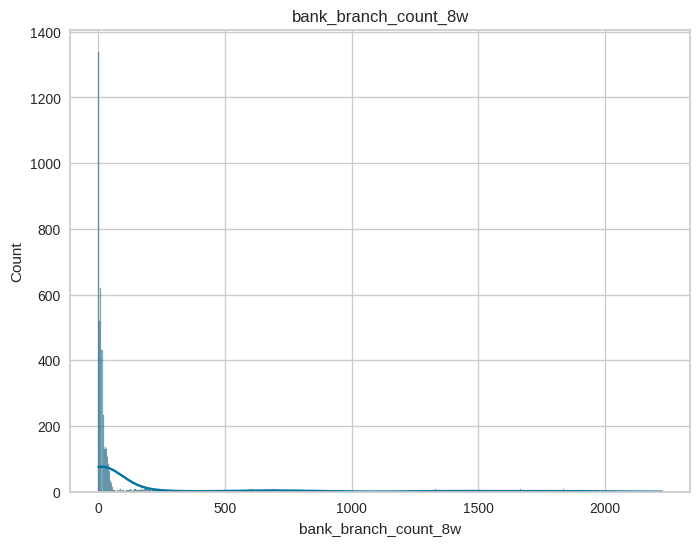

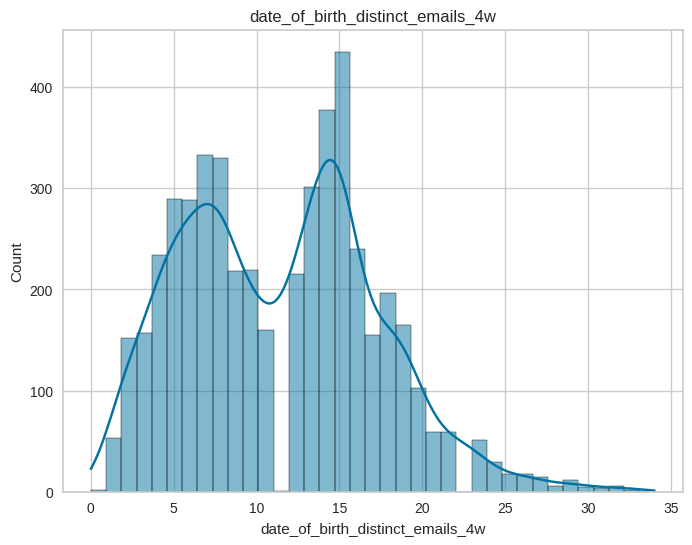

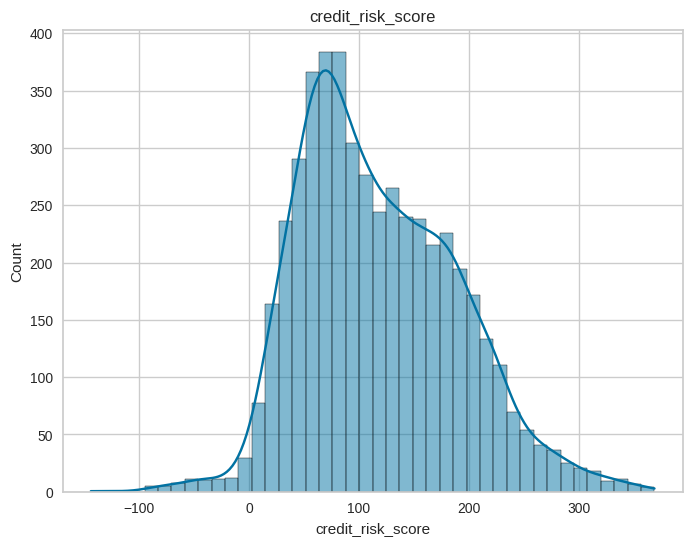

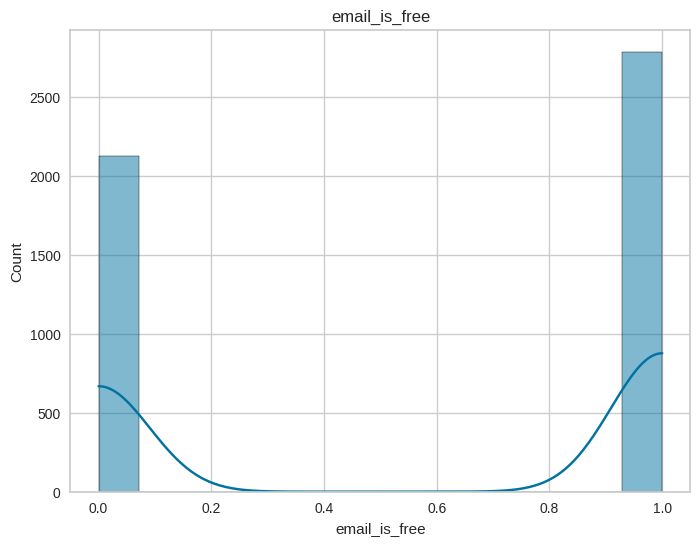

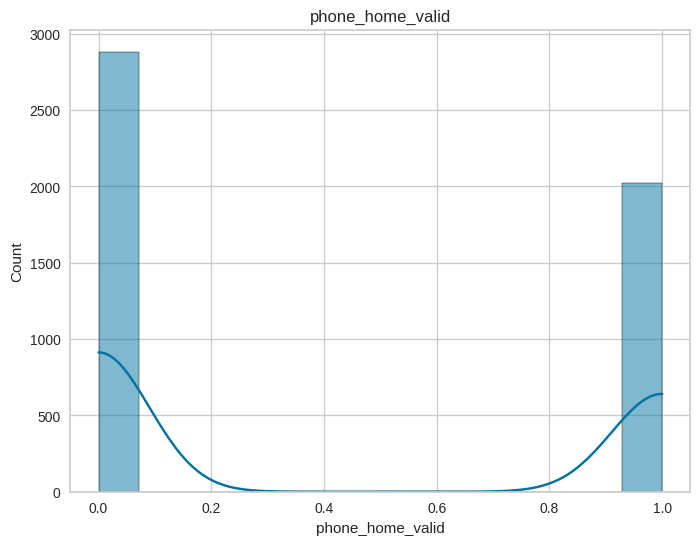

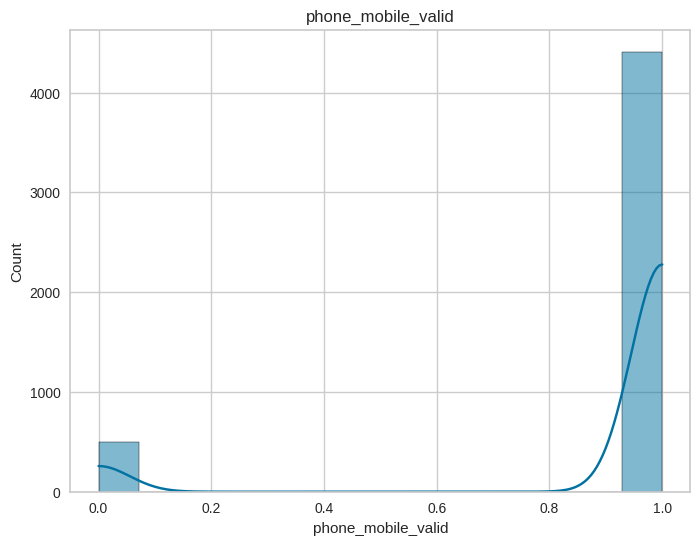

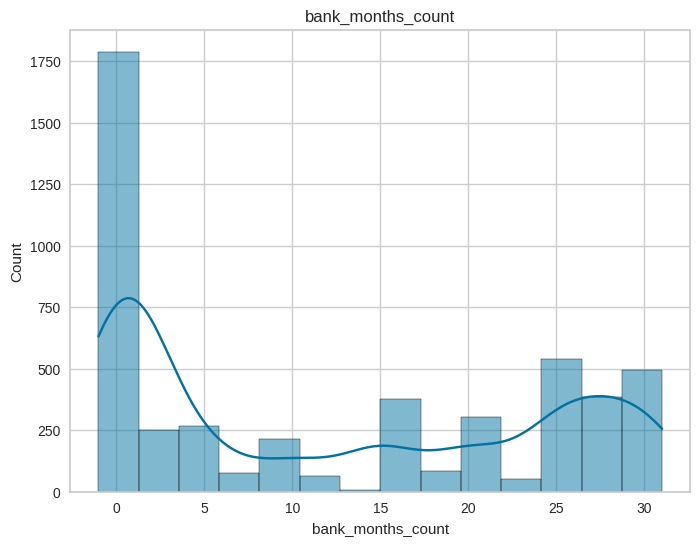

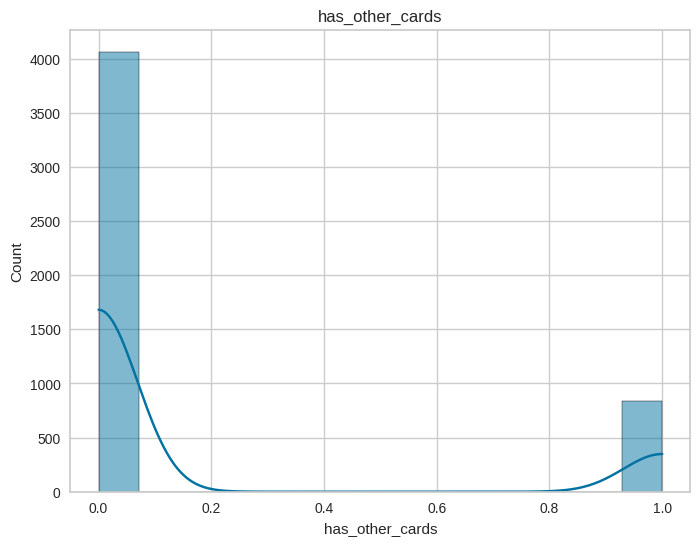

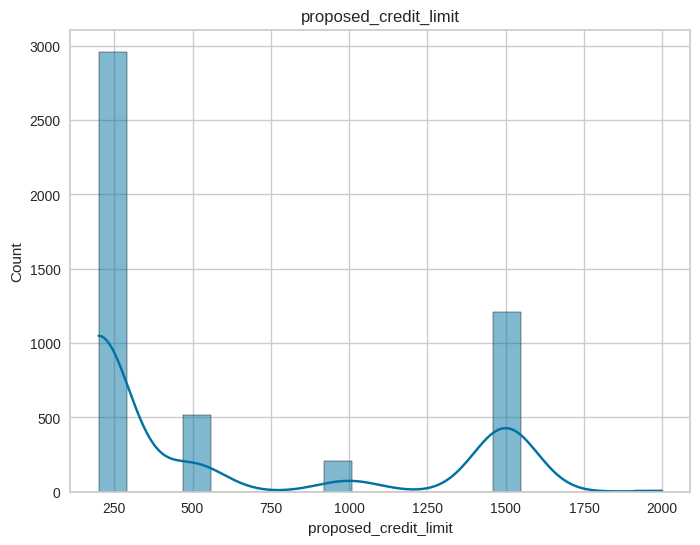

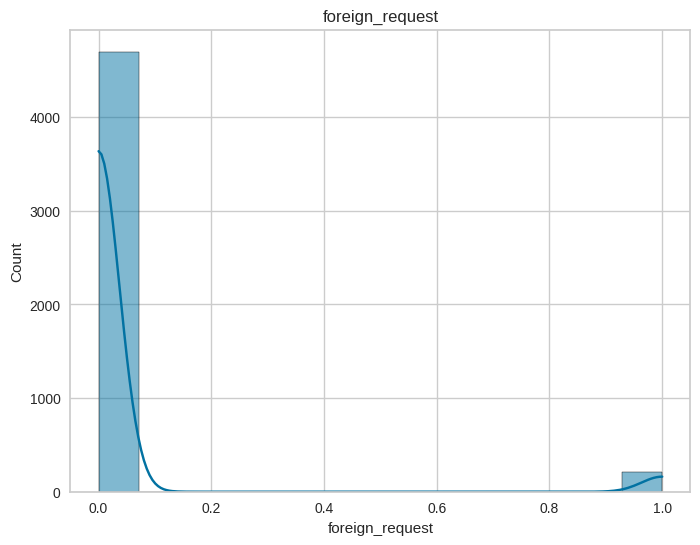

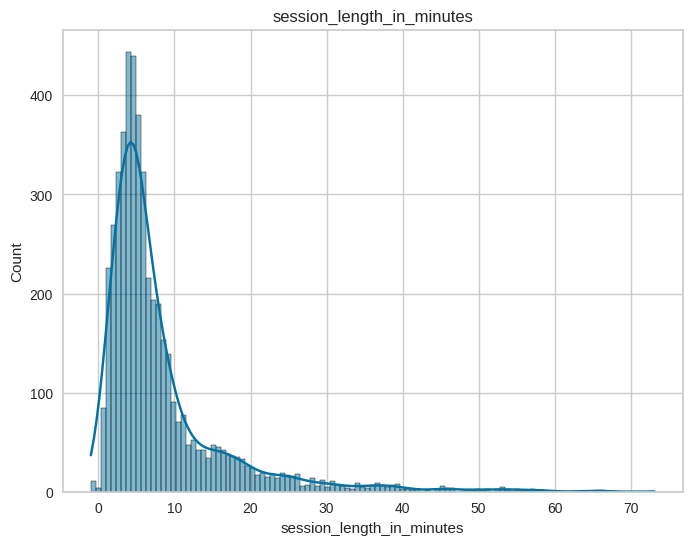

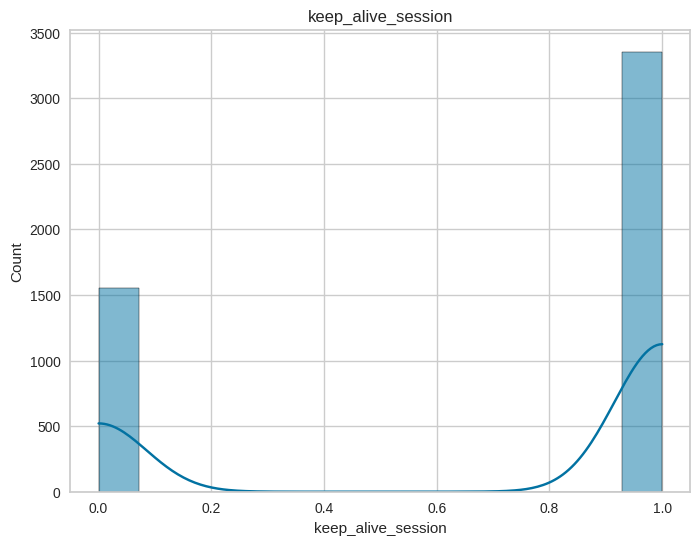

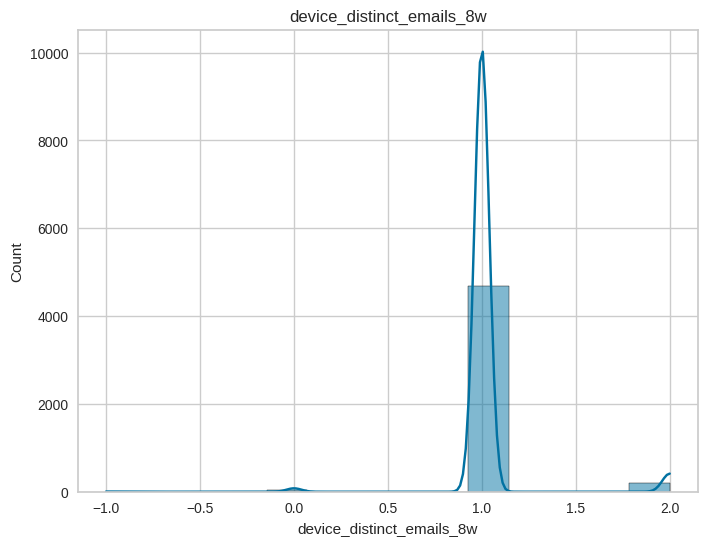

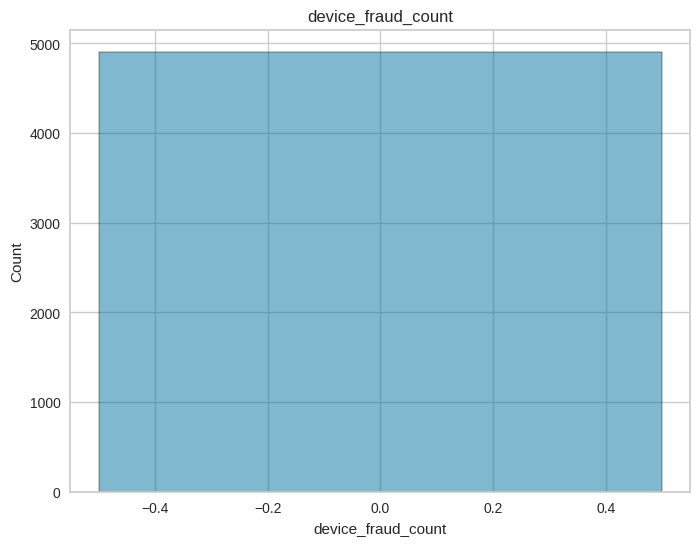

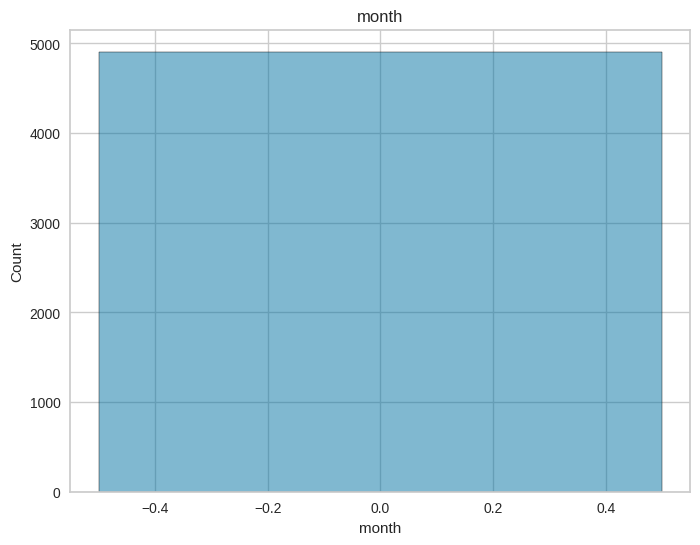

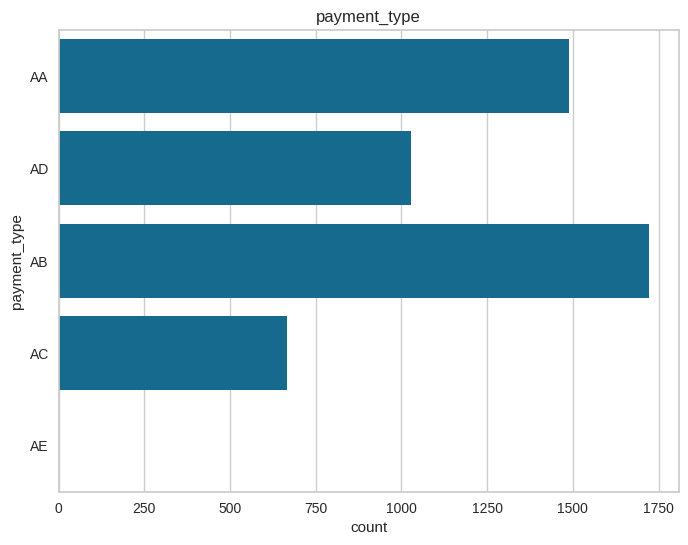

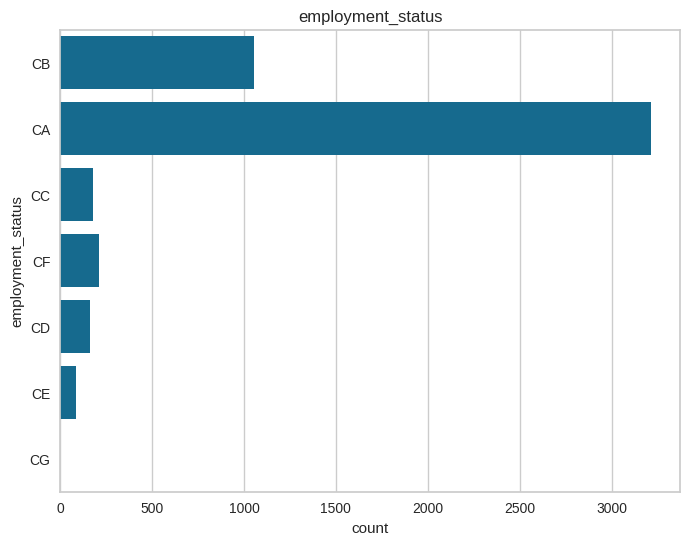

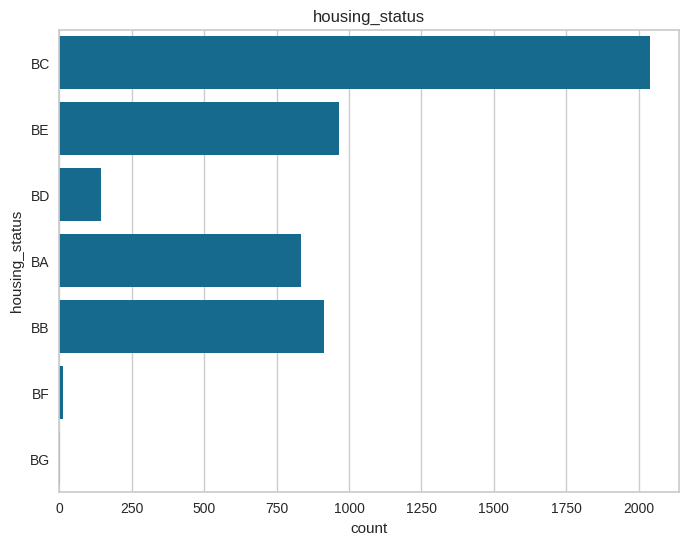

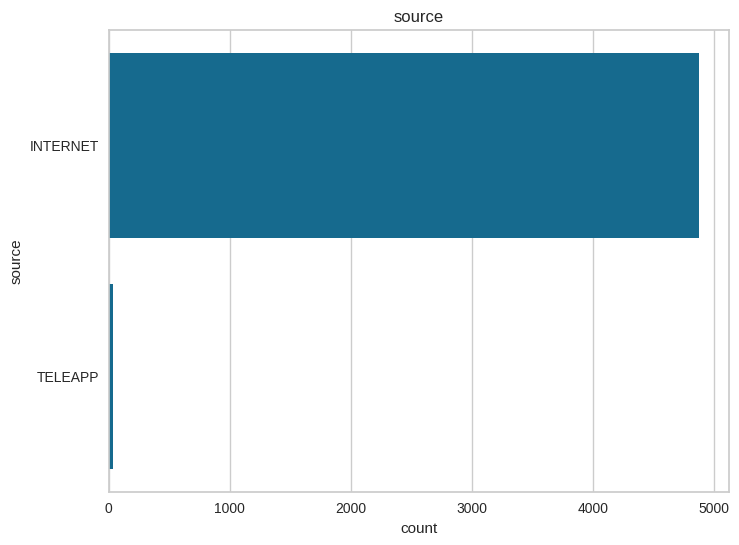

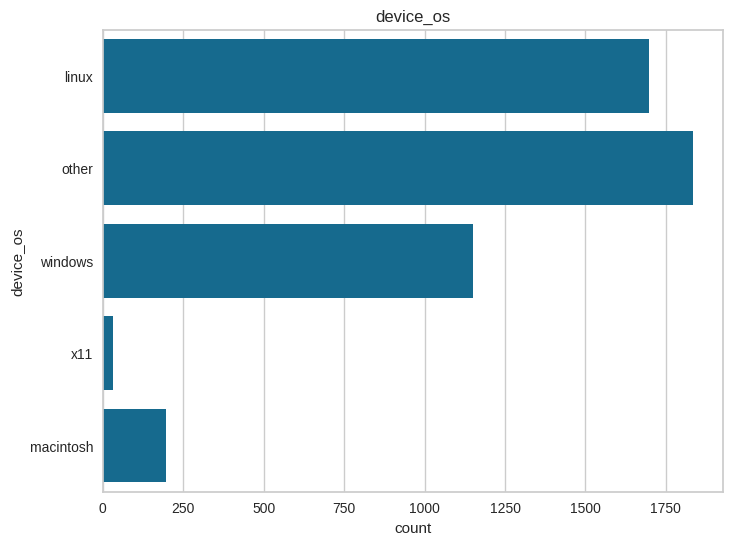

ValueError: could not convert string to float: 'linux'

In [18]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Display summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Data distribution
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.show()

# Categorical variable analysis
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(df[col])
    plt.title(col)
    plt.show()

# Correlation analysis
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

# Feature relationships with target variable
plt.figure(figsize=(10, 8))
sns.scatterplot(x='income', y='fraud_bool', df=df)
plt.title("Income vs Fraud")
plt.show()

plt.figure(figsize=(10, 8))
sns.boxplot(x='payment_type', y='fraud_bool', df=df)
plt.title("Payment Type vs Fraud")
plt.show()

# Outlier detection
plt.figure(figsize=(10, 8))
sns.boxplot(df=df[numeric_cols])
plt.title("Boxplot of Numeric Variables")
plt.xticks(rotation=45)
plt.show()




**Data Preprocessing**

One-Hot Encoding

In [50]:
df.shape


(4897, 32)

In [51]:
df = pd.get_dummies(df)
df.shape

(4897, 53)

In [52]:
numerical_cols = [cname for cname in df.loc[:, :'month'].columns if
                  pd.to_numeric(df[cname], errors='coerce').notna().all() and
                  df[cname].min() >= 0 and
                  df[cname].dtype in ['int64', 'float64']]

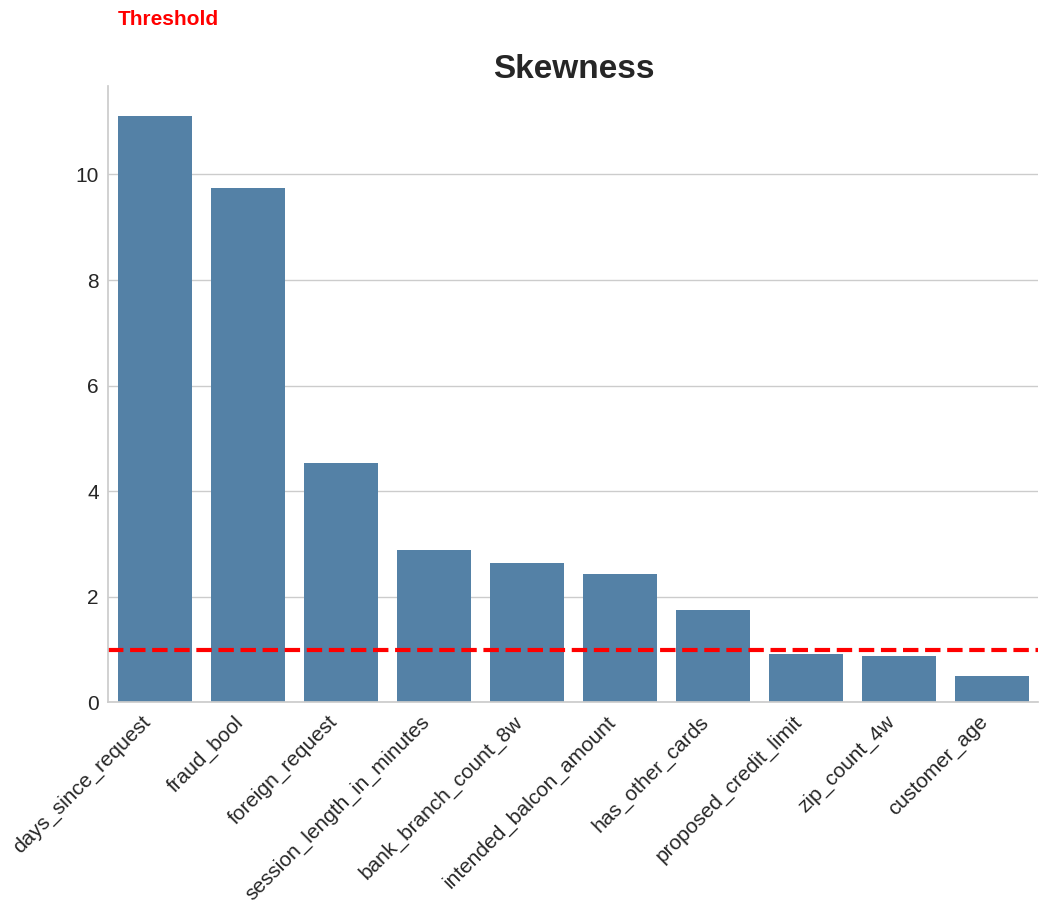

In [53]:
plt.figure(figsize=(12, 8))
skew_features = df[numerical_cols].apply(lambda x: skew(x))
skew_features = skew_features[skew_features > 0.5].sort_values(ascending=False)
ax = sns.barplot(x=skew_features.index, y=skew_features.values, color='SteelBlue')
ax.set_ylabel('', fontsize=20)
ax.set_xlabel('', fontsize=20)
ax.tick_params(axis='both', labelsize=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=15)
ax.axhline(y=1, color='red', linestyle='--', linewidth=3)
ax.set_title('Skewness', ha = 'center', weight='bold', fontsize=24)
ax.text(0.01, 1.1, 'Threshold', color='red', transform=ax.transAxes, fontsize=15, weight='bold')
sns.despine()
plt.gca().set_facecolor('white')
plt.show()

Feature Scaling

In [55]:
def check_normality(features, data_frame):
    for feature in features:
        plt.figure(figsize=(8, 8))
        ax = plt.subplot(1, 1, 1)
        stats.probplot(data_frame[feature], dist=stats.norm, plot=ax)
        ax.set_title(f'{feature} Q-Q plot', fontsize=20)
        sns.despine()

        mean = data_frame[feature].mean()
        std = data_frame[feature].std()
        skewness = data_frame[feature].skew()

        print(f'{feature} - Mean: {mean:.4f}, Std: {std:.4f}, Skewness: {skewness:.4f}')

days_since_request - Mean: 0.7306, Std: 4.5179, Skewness: 11.1097
zip_count_4w - Mean: 2187.1429, Std: 1350.8786, Skewness: 0.8835
proposed_credit_limit - Mean: 591.2845, Std: 555.9273, Skewness: 0.9259


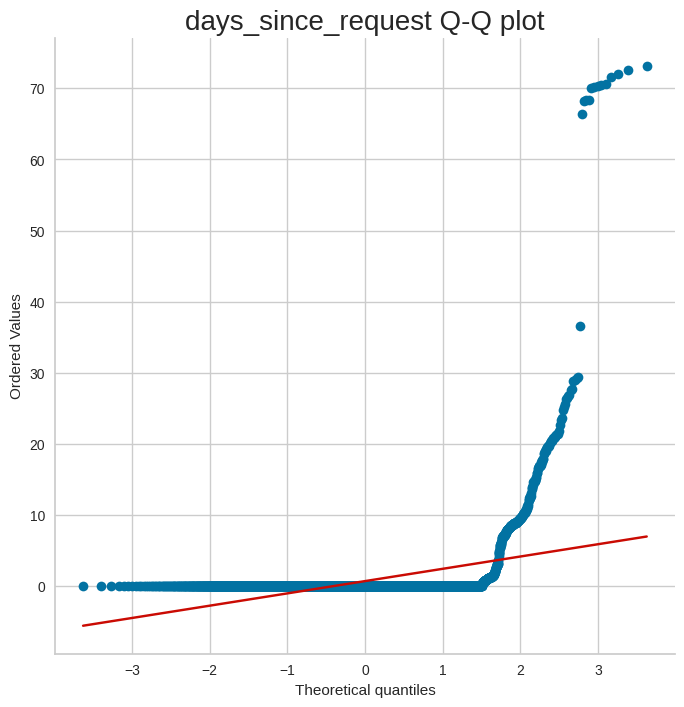

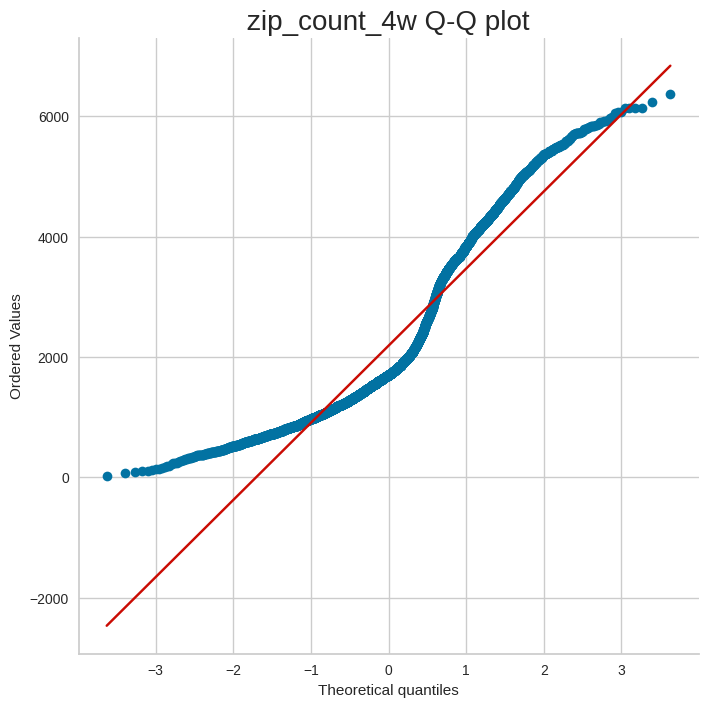

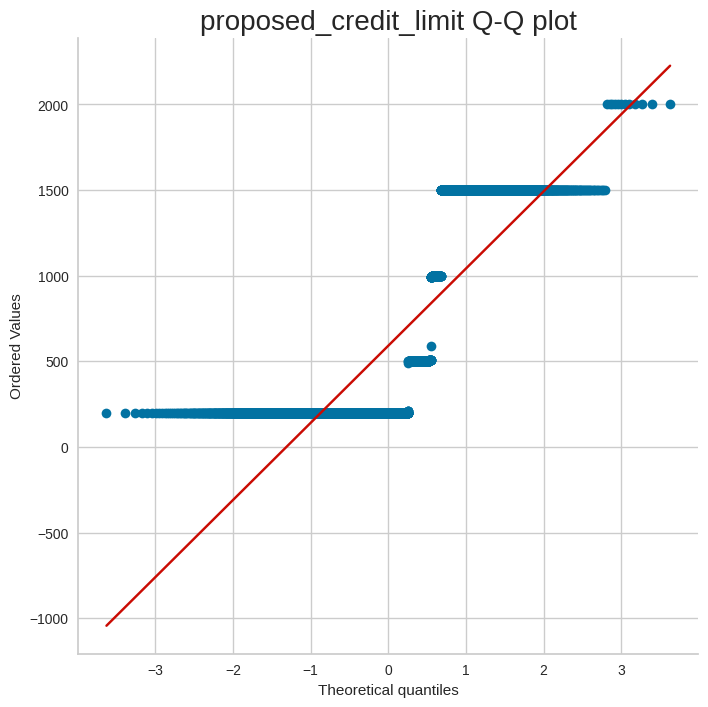

In [56]:
features = ['days_since_request', 'zip_count_4w', 'proposed_credit_limit']
check_normality(features, df)

In [57]:
def plot_histograms(features, data_frame, color=None):
    for feature in features:
        fig = px.histogram(data_frame, x=feature, color=color,
                            marginal="box",
                            barmode="overlay",
                            histnorm='density'
                            )
        fig.update_layout(
            title=f'Histogram of {feature}',
            xaxis_title=feature,
            yaxis_title='Density'
        )
        fig.show()

In [59]:
features = ['days_since_request', 'zip_count_4w', 'proposed_credit_limit']
plot_histograms(features, df, color='fraud_bool')

Logarithmic Scaling

In [60]:

columns_to_transform = ['days_since_request', 'zip_count_4w', 'proposed_credit_limit']

# Apply natural logarithm transformation to specified columns
df[columns_to_transform] = np.log1p(df[columns_to_transform])

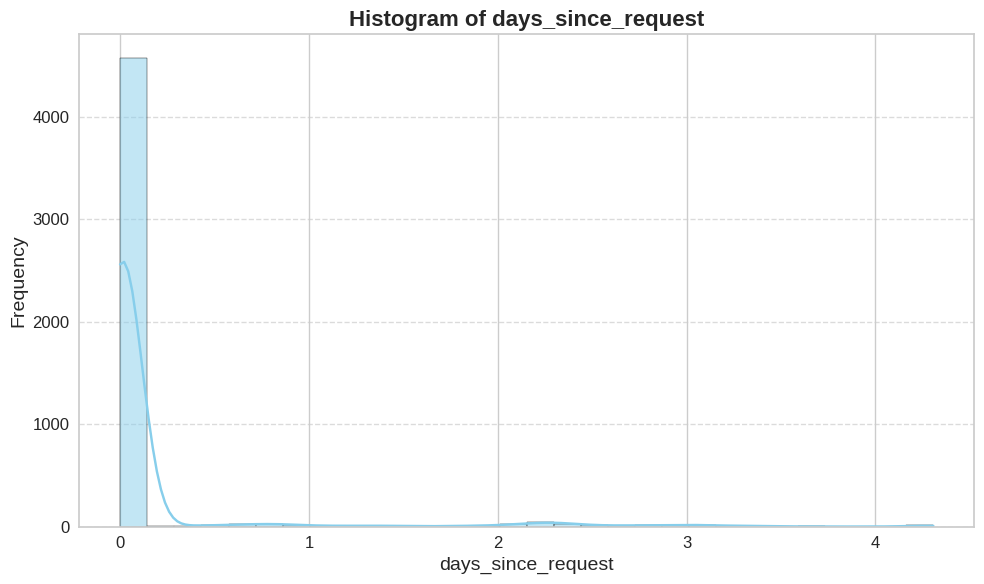


DAYS_SINCE_REQUEST NORMALITY TEST:
-------------------------------------
Skewness:	 4.6213
Kurtosis:	 21.7225
-------------------------------------



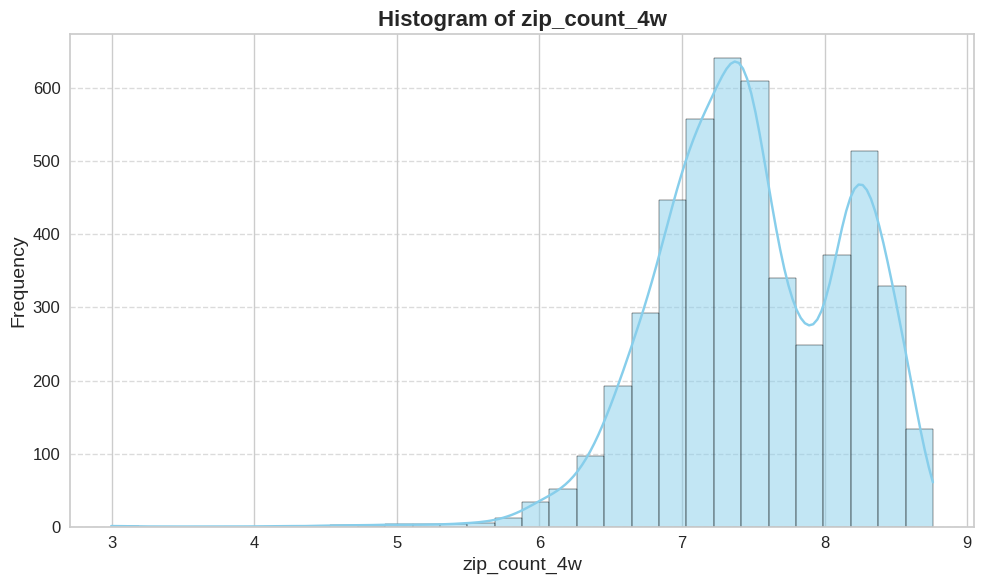


ZIP_COUNT_4W NORMALITY TEST:
-------------------------------------
Skewness:	 -0.2735
Kurtosis:	 0.3567
-------------------------------------



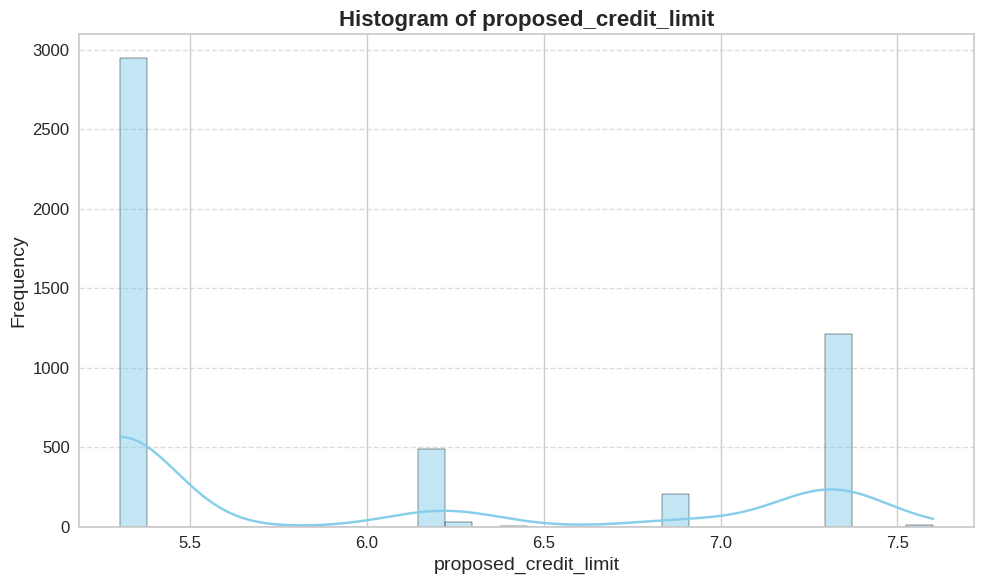


PROPOSED_CREDIT_LIMIT NORMALITY TEST:
-------------------------------------
Skewness:	 0.6995
Kurtosis:	 -1.3313
-------------------------------------



In [62]:
def plot_hist_and_check_normality(df, cols):
    for col in cols:
        # Plot histogram
        plt.figure(figsize=(10, 6))
        sns.histplot(df[col], bins=30, kde=True, color='skyblue', edgecolor='black')
        plt.title(f'Histogram of {col}', fontsize=16, fontweight='bold')
        plt.xlabel(col, fontsize=14)
        plt.ylabel('Frequency', fontsize=14)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

        # Check normality
        print(f'\n{col.upper()} NORMALITY TEST:')
        print('-------------------------------------')
        print('Skewness:\t', round(skew(df[col]), 4))
        print('Kurtosis:\t', round(df[col].kurtosis(), 4))
        print('-------------------------------------\n')

# Call the function with the desired variables
cols_to_plot = ['days_since_request', 'zip_count_4w', 'proposed_credit_limit']
plot_hist_and_check_normality(df, cols_to_plot)

Drop Highly Correlated Features

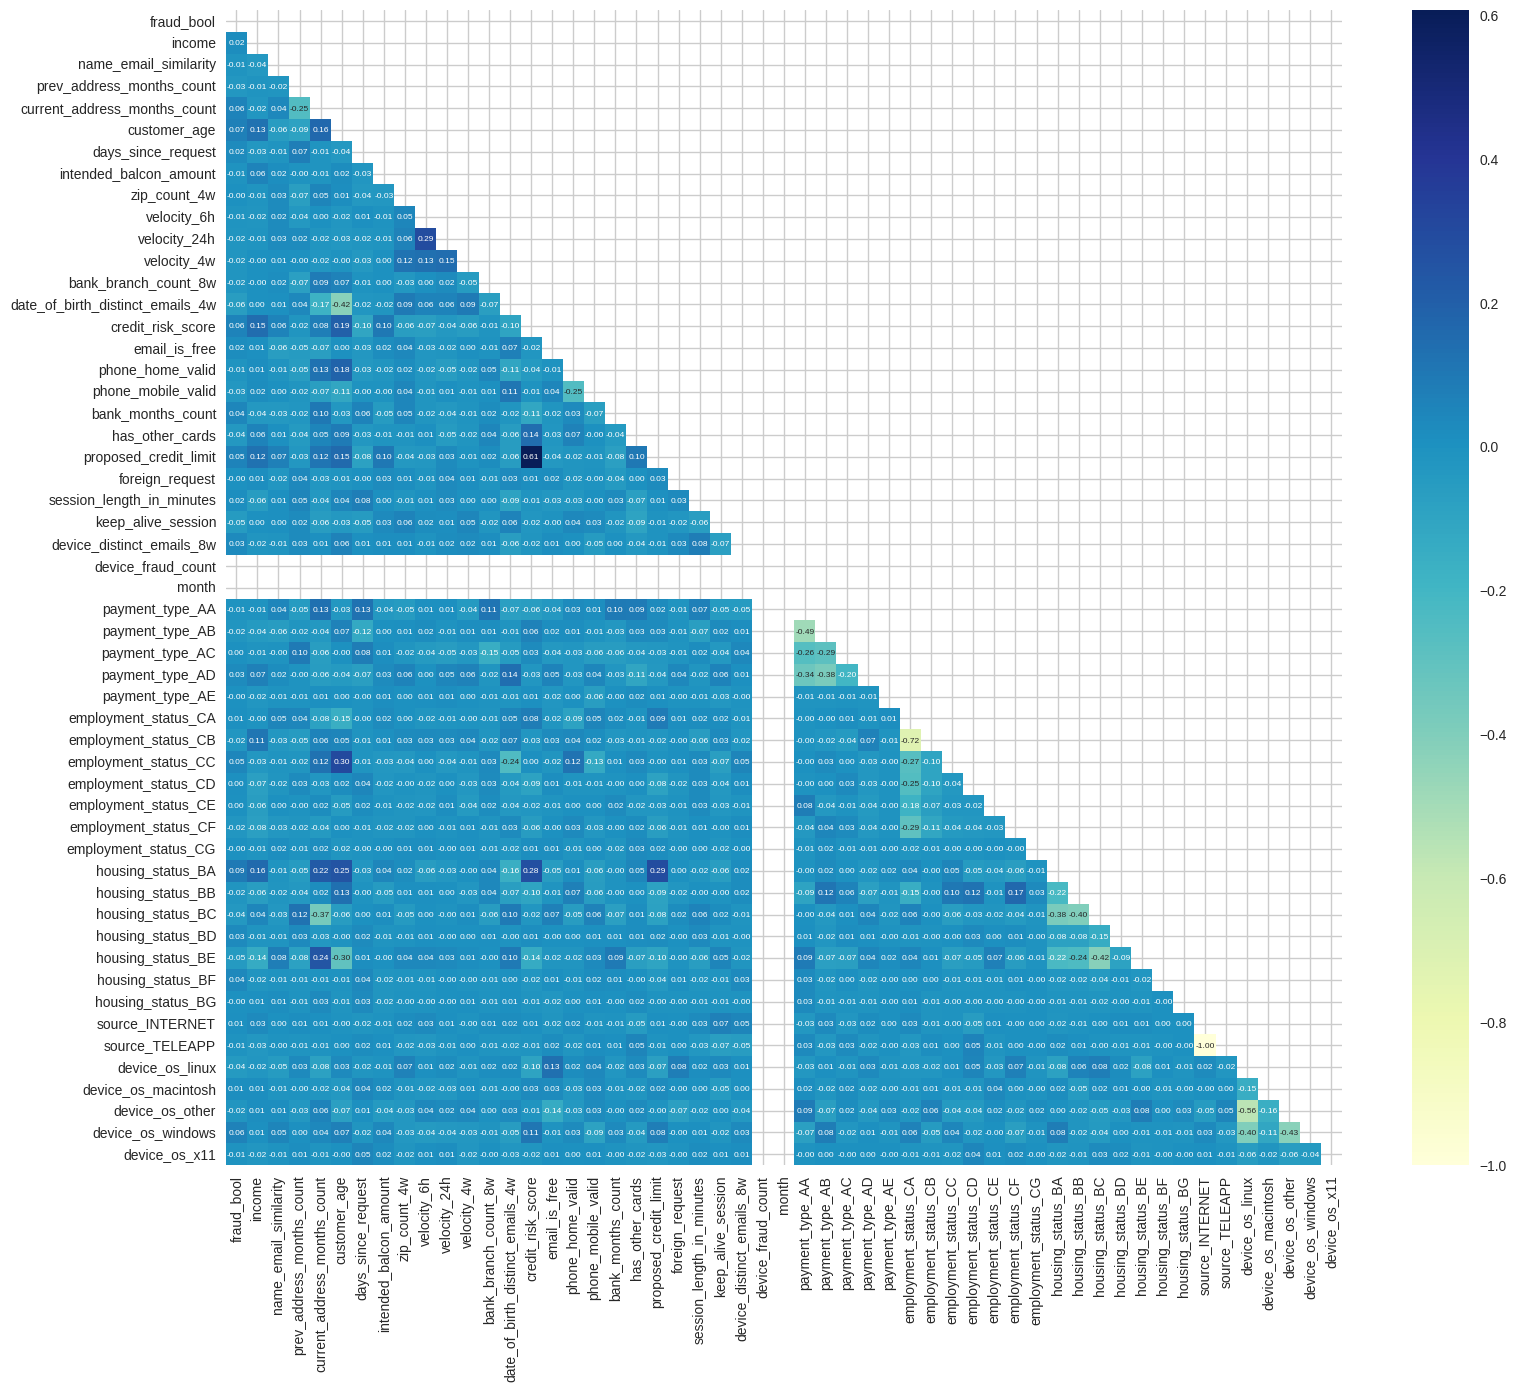

In [63]:
plt.figure(figsize=(18, 15))
cor = df.corr()
mask = np.triu(np.ones_like(cor))
heatmap = sns.heatmap(cor, mask=mask, annot=True, cmap=plt.cm.YlGnBu, annot_kws={"fontsize": 6}, fmt=".2f")  # Set fmt to ".2f" to display 2 decimals
plt.show()

In [64]:
# Function to drop correlated features
def correlation(dataset, threshold):
    col_corr = set ()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if  (corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

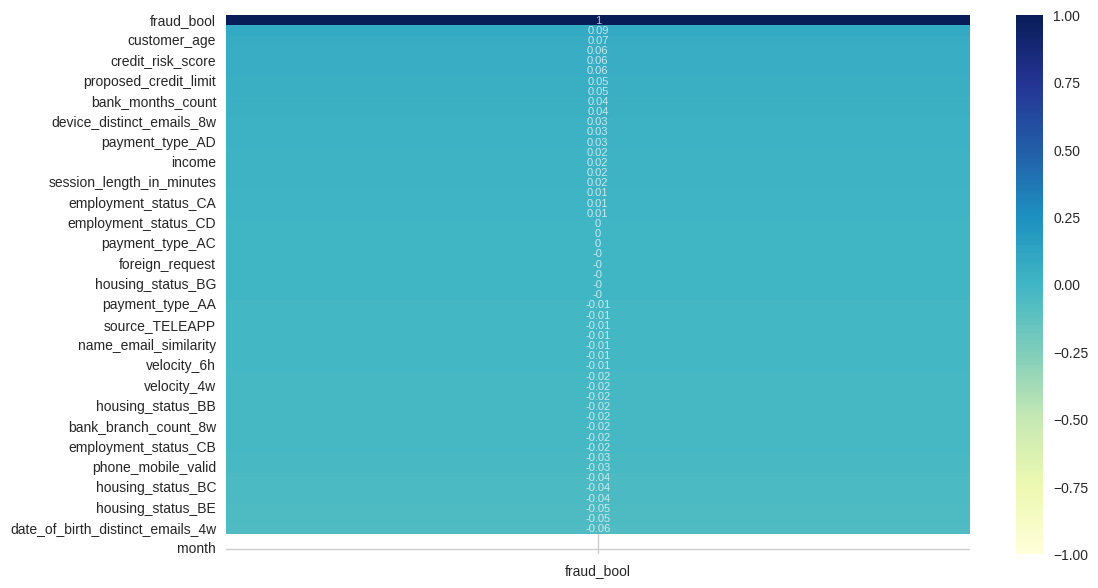

In [68]:
plt.figure(figsize=(12, 7), dpi=100)
corr = df.corr()[['fraud_bool']].sort_values(by='fraud_bool', ascending=False)
corr = corr.round(2)
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap='YlGnBu', annot_kws={"size": 8, "color":'white', "alpha":0.7, "ha": 'center', "va": 'center'})

In [69]:

corr = df.corr().round(1)

# Find features with strong correlation with target
target_corr = corr['fraud_bool'].abs().sort_values(ascending=False)
strong_corr_features = target_corr.index[1:11]

print('Top 10 features with highest correlation with target:')
for feature in strong_corr_features:
    print(f"{feature}: {target_corr[feature]}")

Top 10 features with highest correlation with target:
customer_age: 0.1
proposed_credit_limit: 0.1
housing_status_BA: 0.1
date_of_birth_distinct_emails_4w: 0.1
credit_risk_score: 0.1
current_address_months_count: 0.1
device_os_windows: 0.1
device_os_macintosh: 0.0
device_os_other: 0.0
employment_status_CA: 0.0


Imbalanced Classification

In [70]:

def get_preprocessed_df(df=None):
    df_copy = df.copy()
    # Set 'fraud_bool' as the target variable by moving it to the first column
    target_col = df_copy.pop('fraud_bool')
    df_copy.insert(0, 'fraud_bool', target_col)
    return df_copy

def get_train_test_dataset(df=None):
    df_copy = get_preprocessed_df(df)
    X_features = df_copy.iloc[:, 1:]  # Exclude only the first column
    y_target = df_copy.iloc[:, 0]  # Use the first column as y-axis
    X_train, X_test, y_train, y_test = train_test_split(X_features,
                                                        y_target,
                                                        test_size=0.3,
                                                        random_state=0,
                                                        stratify=y_target)
    return X_train, X_test, y_train, y_test

In [71]:
X_train, X_test, y_train, y_test = get_train_test_dataset(df)

In [73]:
fig = px.histogram(df, x="customer_age",
                   color="fraud_bool",
                   marginal="box",
                   barmode="overlay",
                   histnorm='density'
                  )
fig.update_layout(
    title_text="Original Distribution",
    title_font_color="black",
    legend_title_font_color="black",
    paper_bgcolor="white",
    plot_bgcolor='white',
    font_color="black",
)
fig.show()

In [75]:
#Scatterplo

fig = px.scatter(df, x="customer_age", y="credit_risk_score", color="fraud_bool")
fig.update_layout(
    title_text="",
    title_font_color="black",
    legend_title_font_color="black",
    paper_bgcolor="white",
    plot_bgcolor='white',
    font_color="black",
)

Oversampling Using SMOTE

In [76]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print('Feature/label dataset for training before applying SMOTE: ', X_train.shape, y_train.shape)
print('Feature/label dataset for training after applying SMOTE: ', X_train_smote.shape, y_train_smote.shape)
print('Distribution of label values after applying SMOTE:\n',pd.Series(y_train_smote).value_counts())

Feature/label dataset for training before applying SMOTE:  (3427, 52) (3427,)
Feature/label dataset for training after applying SMOTE:  (6784, 52) (6784,)
Distribution of label values after applying SMOTE:
 fraud_bool
0.0    3392
1.0    3392
Name: count, dtype: int64


In [79]:
fig = px.scatter(df, x="customer_age", y="credit_risk_score", color="fraud_bool")
fig.update_layout(
    title_text="",
    title_font_color="black",
    legend_title_font_color="black",
    paper_bgcolor="white",
    plot_bgcolor='white',
    font_color="black",
)

<Axes: >

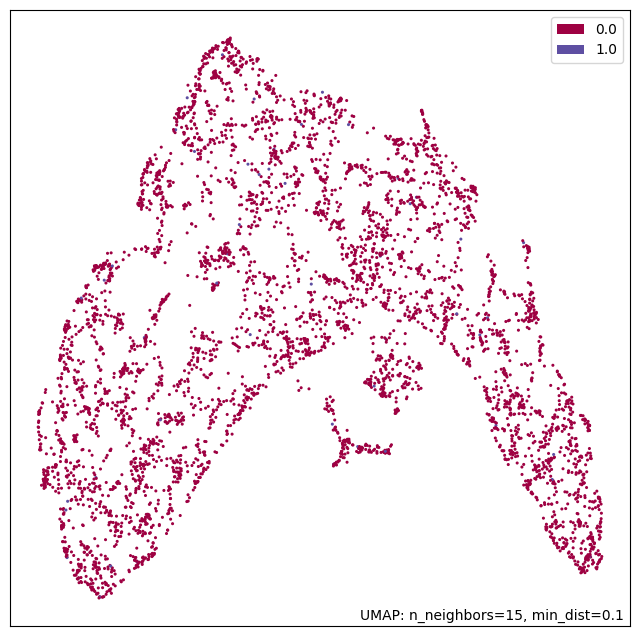

In [80]:
sns.set(style="ticks", context="talk",font_scale = 1)
plt.style.use("default")

mapper = umap.UMAP().fit(df.loc[:,:'month'])
umap.plot.points(mapper, labels=df.loc[:,'fraud_bool'])

In [81]:
smote = SMOTE(random_state=0)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print('Feature/label dataset for training before applying SMOTE: ', X_train.shape, y_train.shape)
print('Feature/label dataset for training after applying SMOTE: ', X_train_smote.shape, y_train_smote.shape)
print('Distribution of label values after applying SMOTE:\n',pd.Series(y_train_smote).value_counts())

Feature/label dataset for training before applying SMOTE:  (3427, 52) (3427,)
Feature/label dataset for training after applying SMOTE:  (6784, 52) (6784,)
Distribution of label values after applying SMOTE:
 fraud_bool
0.0    3392
1.0    3392
Name: count, dtype: int64


In [82]:
train_df =pd.concat([X_train_smote,y_train_smote],axis=1)
X_test_smote, y_test_smote = smote.fit_resample(X_test, y_test)

In [83]:
colors = ['SteelBlue', '#004B87']
labels = ['Non-Fraud','Fraud']
values = train_df['fraud_bool'].value_counts() / train_df['fraud_bool'].shape[0]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=0.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='white', width=2)))
fig.update_layout(
    title_text='<b>Credit Card Fraud</b>',
    title_font_color='black',
    title_font=dict(size=24),
    legend_title_font_color='black',
    paper_bgcolor='white',
    plot_bgcolor='white',
    font_color='black',
)

fig.show()


In [84]:
classifier = setup(data=train_df, preprocess=False, target='fraud_bool', verbose=0)

In [85]:
decisiontree = create_model('dt') # decision tree
gbm = create_model('gbc') # gradient boosting machine
logisticregression = create_model('lr') # logistic regression

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [86]:
tuned_decisiontree = tune_model(decisiontree, optimize = 'AUC')
tuned_gradientboosting = tune_model(gbm, optimize = 'AUC')
tuned_logisticregression = tune_model(logisticregression, optimize = 'AUC')

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Decision Tree

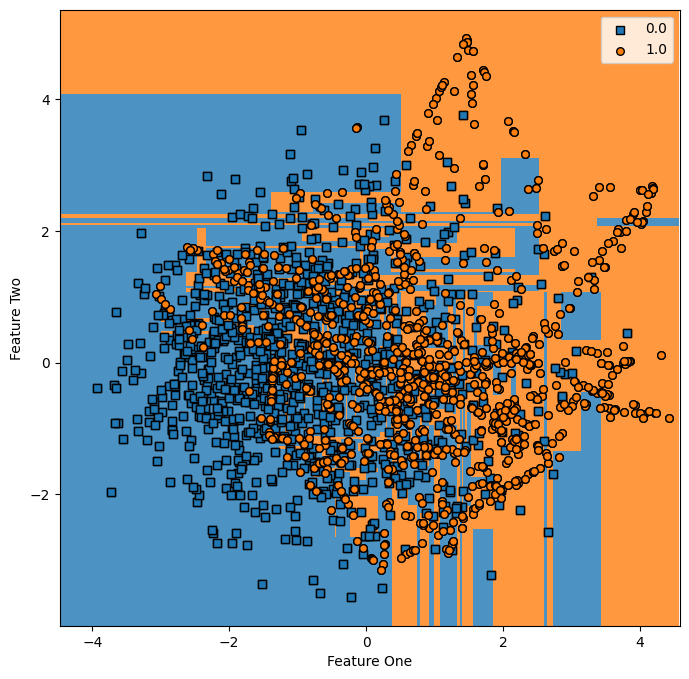

In [87]:
plt.figure(figsize=(8, 8))
plot_model(tuned_decisiontree, plot='boundary')

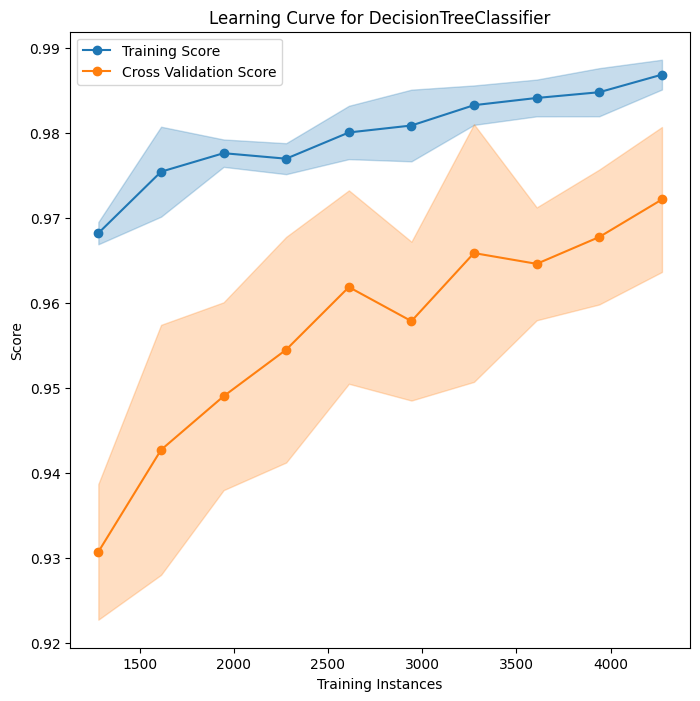

In [88]:
plt.figure(figsize=(8, 8))
plot_model(tuned_decisiontree, plot='learning')

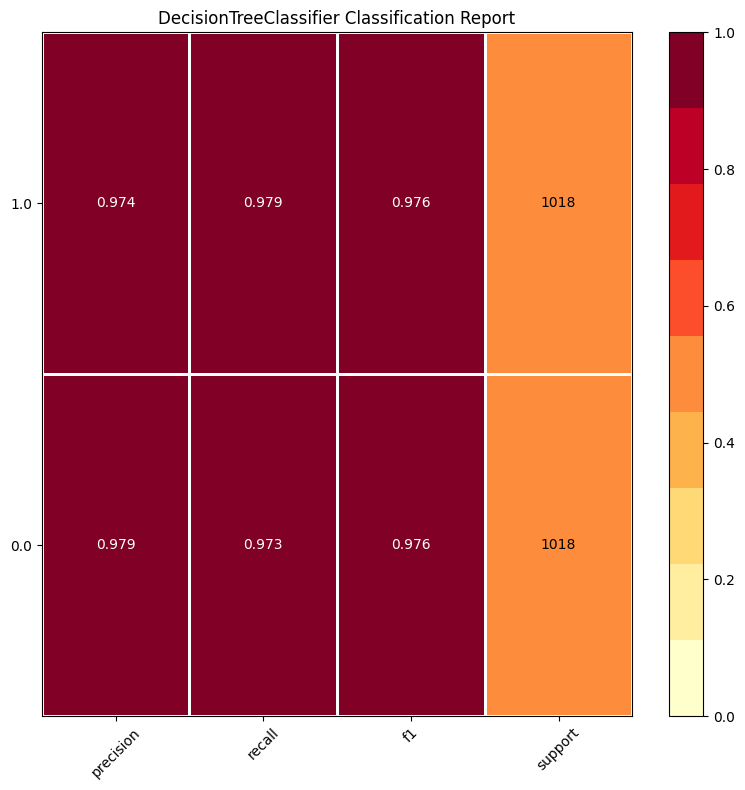

In [89]:
plt.figure(figsize=(8, 8))
plot_model(tuned_decisiontree, plot='class_report')

In [104]:
pred = tuned_decisiontree.predict(X_test_smote)

In [105]:
final_model_result = confusion_matrix(y_test_smote, pred)
accuracy = accuracy_score(y_test_smote , pred)
precision = precision_score(y_test_smote , pred)
recall = recall_score(y_test_smote , pred)
f1 = f1_score(y_test_smote,pred)
print('accuracy: {0:.4f}, precision: {1:.4f}, recall: {2:.4f},\
F1: {3:.4f}'.format(accuracy, precision, recall, f1))

accuracy: 0.6687, precision: 0.9439, recall: 0.3588,F1: 0.5199


Text(0.5, 1.0, 'Confusion Matrix (Decision Tree Classifier)')

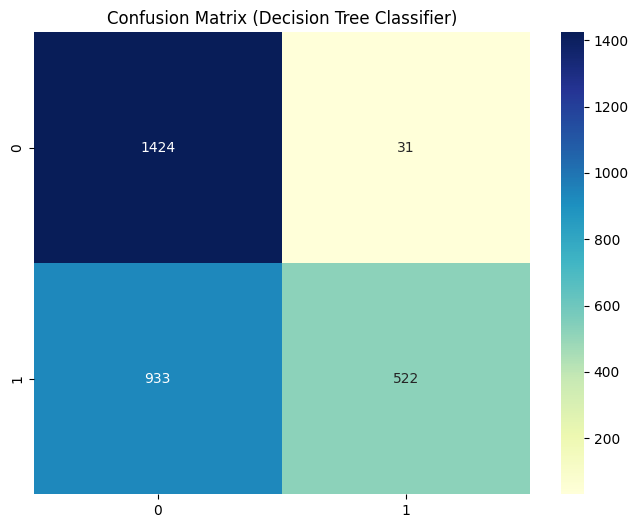

In [106]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(final_model_result, cmap = 'YlGnBu',annot = True, fmt='d')
ax.set_title('Confusion Matrix (Decision Tree Classifier)')

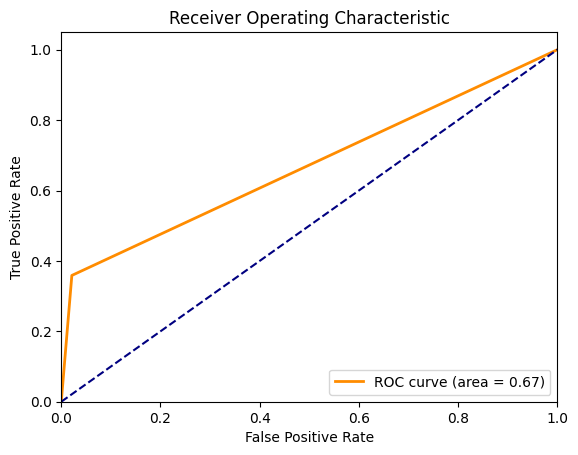

AUC: 0.6687


In [107]:
# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_smote, pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

print('AUC: {0:.4f}'.format(roc_auc))

Gradient Boosting Machine

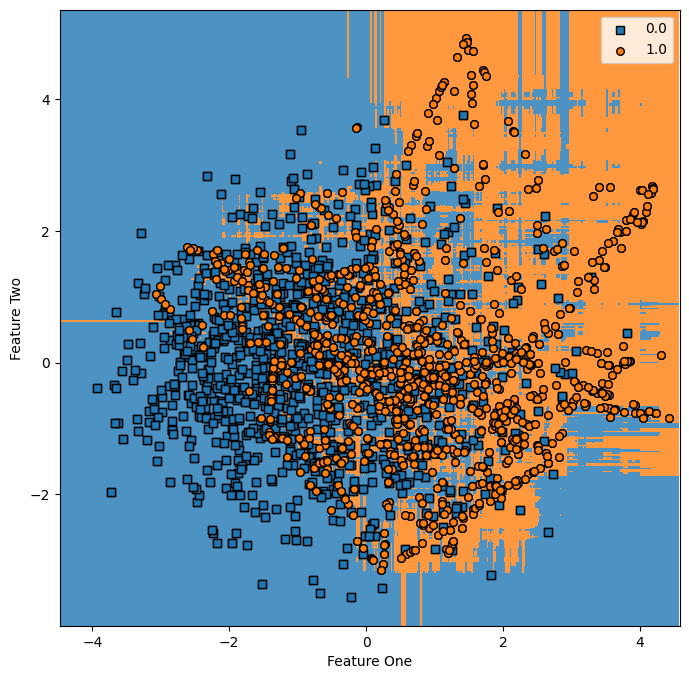

In [90]:
plt.figure(figsize=(8, 8))
plot_model(tuned_gradientboosting, plot='boundary')

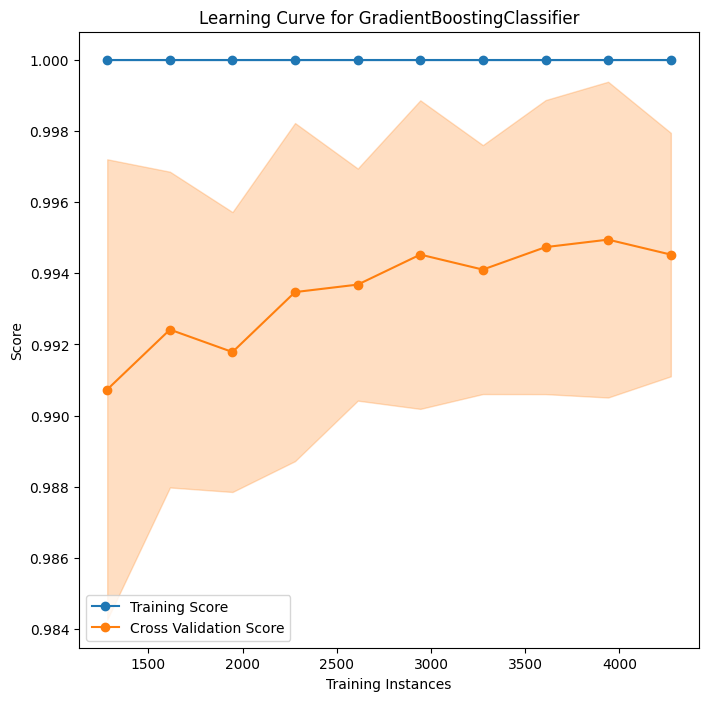

In [91]:
plt.figure(figsize=(8, 8))
plot_model(tuned_gradientboosting, plot='learning')

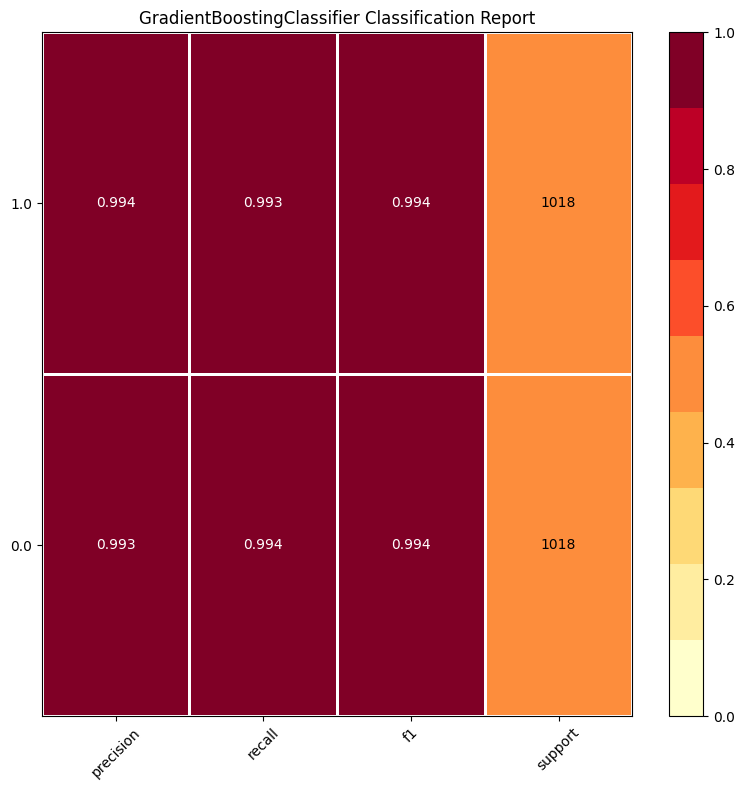

In [92]:
plt.figure(figsize=(8, 8))
plot_model(tuned_gradientboosting, plot='class_report')

In [100]:
pred = tuned_gradientboosting.predict(X_test_smote)

In [101]:
final_model_result = confusion_matrix(y_test_smote, pred)
accuracy = accuracy_score(y_test_smote , pred)
precision = precision_score(y_test_smote , pred)
recall = recall_score(y_test_smote , pred)
f1 = f1_score(y_test_smote,pred)
print('accuracy: {0:.4f}, precision: {1:.4f}, recall: {2:.4f},\
F1: {3:.4f}'.format(accuracy, precision, recall, f1))

accuracy: 0.8632, precision: 0.9953, recall: 0.7299,F1: 0.8422


Text(0.5, 1.0, 'Confusion Matrix (GBM Classifier)')

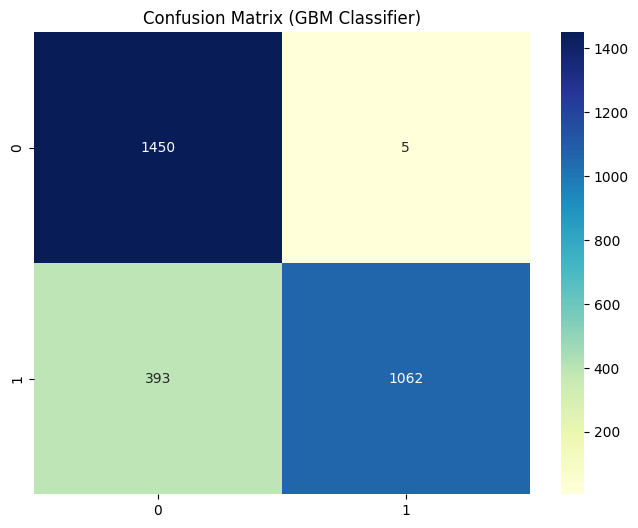

In [102]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(final_model_result, cmap = 'YlGnBu',annot = True, fmt='d')
ax.set_title('Confusion Matrix (GBM Classifier)')

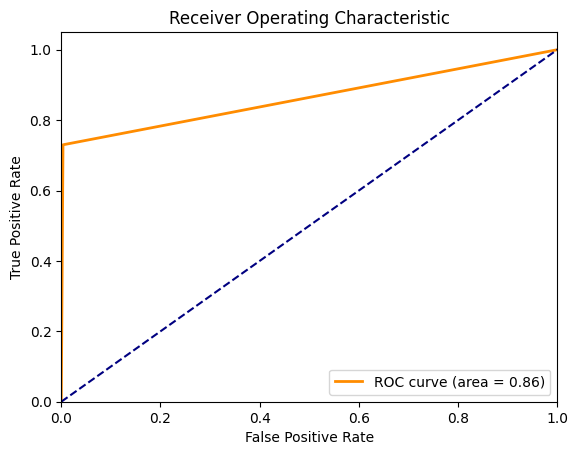

AUC: 0.8632


In [103]:
# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_smote, pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

print('AUC: {0:.4f}'.format(roc_auc))

Logistic Regression

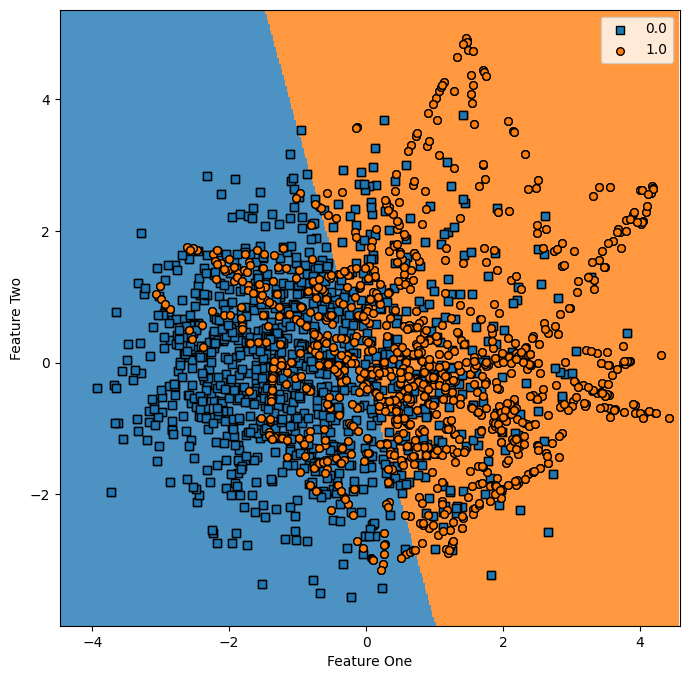

In [93]:
plt.figure(figsize=(8, 8))
plot_model(tuned_logisticregression, plot='boundary')

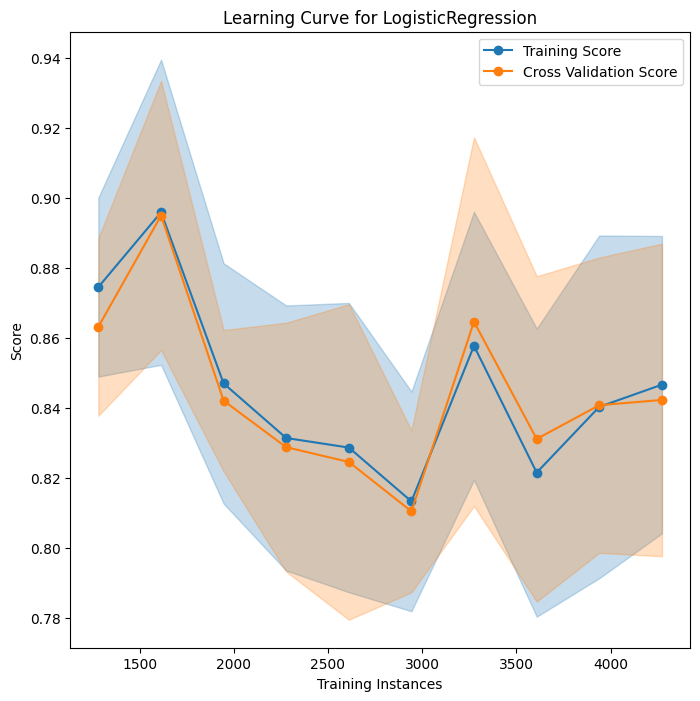

In [94]:
plt.figure(figsize=(8, 8))
plot_model(tuned_logisticregression, plot='learning')

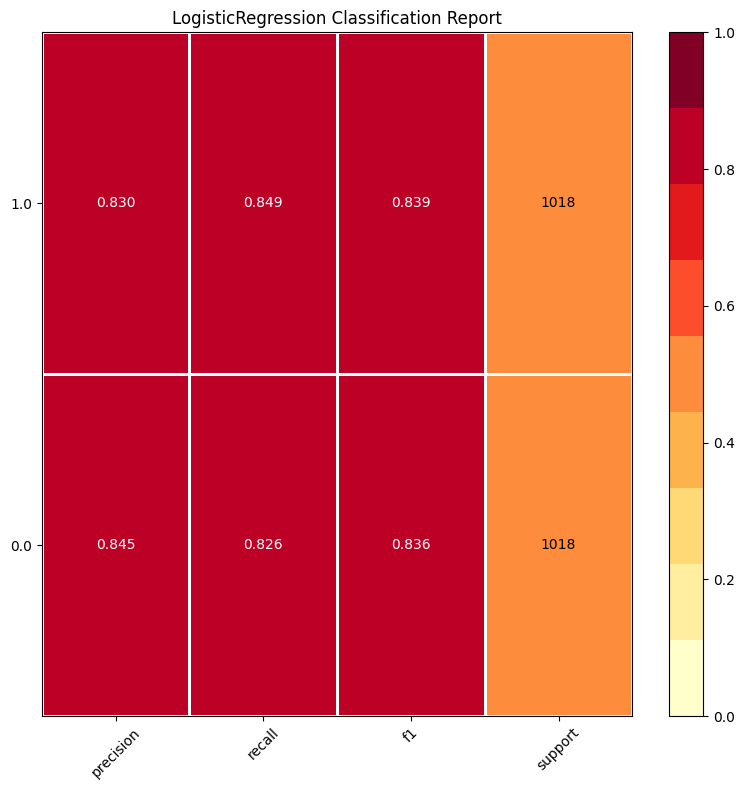

In [95]:
plt.figure(figsize=(8, 8))
plot_model(tuned_logisticregression, plot='class_report')

In [96]:
pred = tuned_logisticregression.predict(X_test_smote)

In [97]:
final_model_result = confusion_matrix(y_test_smote, pred)
accuracy = accuracy_score(y_test_smote , pred)
precision = precision_score(y_test_smote , pred)
recall = recall_score(y_test_smote , pred)
f1 = f1_score(y_test_smote,pred)
print('accuracy: {0:.4f}, precision: {1:.4f}, recall: {2:.4f},\
F1: {3:.4f}'.format(accuracy, precision, recall, f1))

accuracy: 0.7430, precision: 0.7948, recall: 0.6550,F1: 0.7182


Text(0.5, 1.0, 'Confusion Matrix (Logistic Regression)')

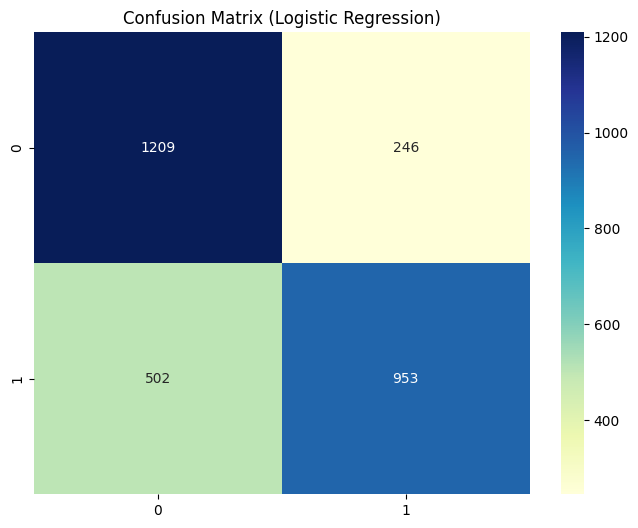

In [98]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(final_model_result, cmap = 'YlGnBu',annot = True, fmt='d')
ax.set_title('Confusion Matrix (Logistic Regression)')

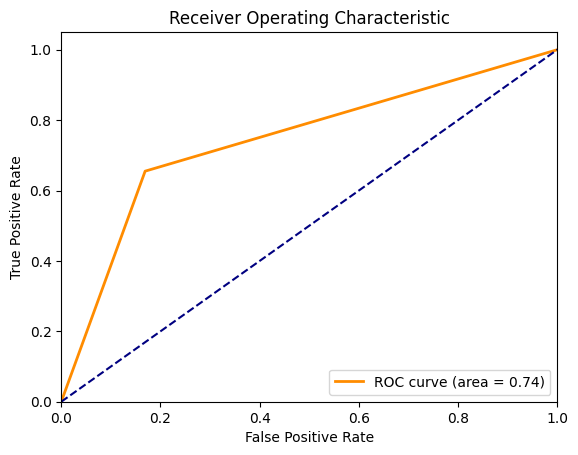

AUC: 0.7430


In [99]:
# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_smote, pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

print('AUC: {0:.4f}'.format(roc_auc))

Evaluation Metrics

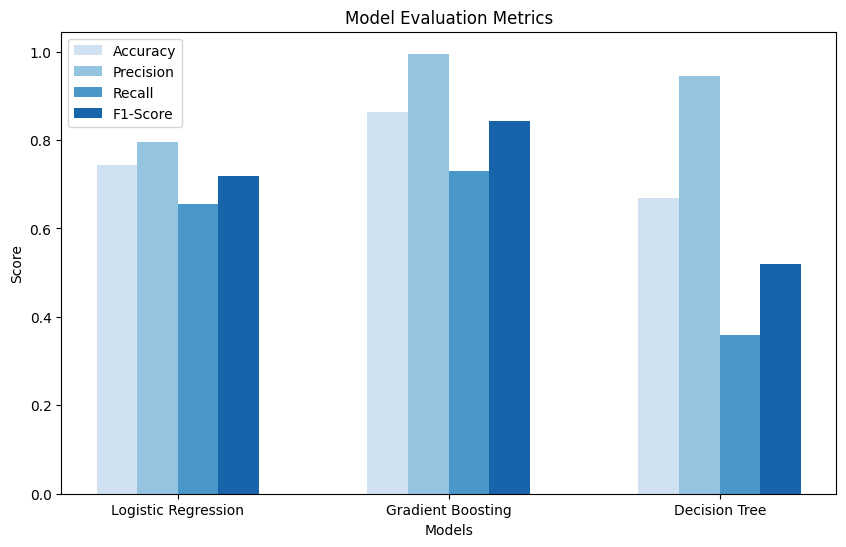

In [108]:
# Calculate evaluation metrics for each model
models = [tuned_logisticregression, tuned_gradientboosting, tuned_decisiontree]
model_names = ['Logistic Regression', 'Gradient Boosting', 'Decision Tree']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

scores = []

for model in models:
    y_pred = model.predict(X_test_smote)
    accuracy = accuracy_score(y_test_smote, y_pred)
    precision = precision_score(y_test_smote, y_pred)
    recall = recall_score(y_test_smote, y_pred)
    f1 = f1_score(y_test_smote, y_pred)
    scores.append([accuracy, precision, recall, f1])

colors = plt.cm.Blues(np.linspace(0.2, 0.8, len(metrics)))

# Plot the bar plot
plt.figure(figsize=(10, 6))
x = np.arange(len(model_names))
width = 0.15

for i, metric in enumerate(metrics):
    plt.bar(x + (i * width), [score[i] for score in scores], width, label=metric, color=colors[i])

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Evaluation Metrics')
plt.xticks(x + (width * 1.5), model_names)
plt.legend()

plt.show()

Precision-Recall Curv

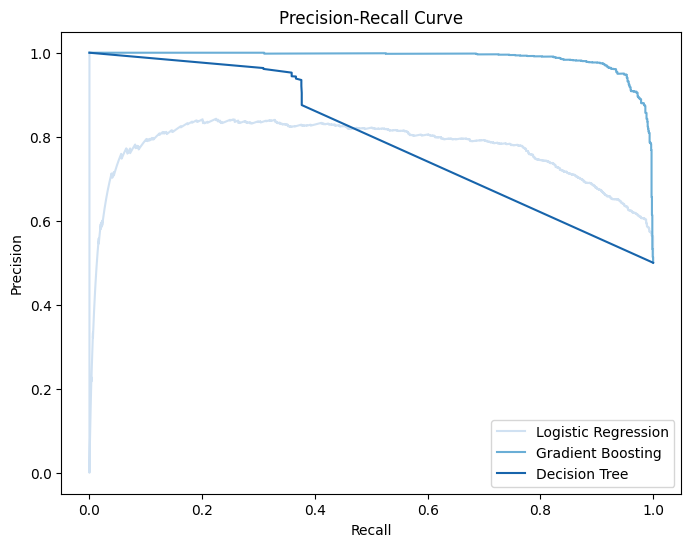

In [109]:
# Calculate precision and recall for each model
models = [tuned_logisticregression, tuned_gradientboosting, tuned_decisiontree]
model_names = ['Logistic Regression', 'Gradient Boosting', 'Decision Tree']

plt.figure(figsize=(8, 6))

colors = plt.cm.Blues(np.linspace(0.2, 0.8, len(models)))

for model, name, color in zip(models, model_names, colors):
    y_pred_prob = model.predict_proba(X_test_smote)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test_smote, y_pred_prob)
    plt.plot(recall, precision, label=name, color=color)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower right')

plt.show()

Receiver Operating Characteristic (ROC)

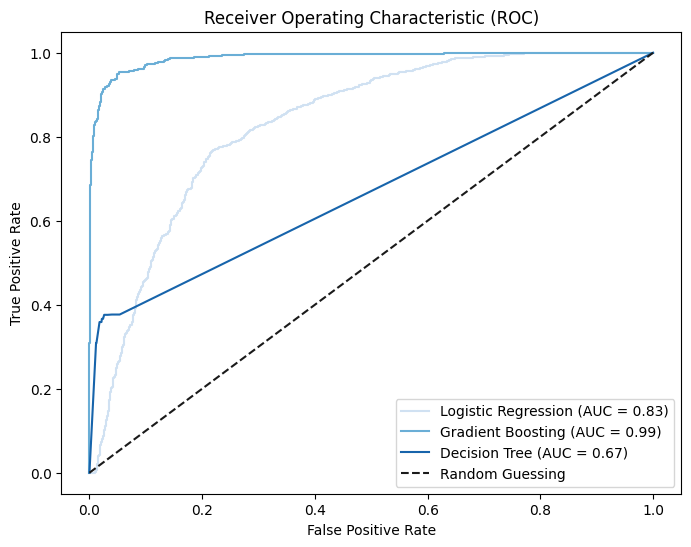

In [110]:
# Calculate the ROC curve and AUC for each model
models = [tuned_logisticregression, tuned_gradientboosting, tuned_decisiontree]
model_names = ['Logistic Regression', 'Gradient Boosting', 'Decision Tree']

plt.figure(figsize=(8, 6))

colors = plt.cm.Blues(np.linspace(0.2, 0.8, len(models)))

for model, name, color in zip(models, model_names, colors):
    y_pred_prob = model.predict_proba(X_test_smote)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test_smote, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})', color=color)

plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')

plt.show()